#### <p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [7]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [8]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [9]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [10]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 265.8993539 seconds


In [11]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [11]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [12]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [13]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [13]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [49]:
train_df = pd.read_csv("train_df")
test_df = pd.read_csv("test_df")
cv_df = pd.read_csv("cv_df")

In [93]:
train_df.head()

,Unnamed: 0,ID,Gene,Variation,Class,TEXT,Text_Count,Char_Count,Avg_Count,Gene_Share,Variation_Share
0,2487,2487,BRCA1,V1534M,5,mutations brca1 brca2 account majority heredit...,0.018560,0.018863,0.021883,0.0,0.0
1,749,749,ERBB2,D769Y,7,functional characterization cancer associated ...,0.011855,0.011665,0.021186,0.0,0.0
2,2025,2025,MAP2K1,K57E,7,histiocytic neoplasms clonal hematopoietic dis...,0.018109,0.018908,0.022481,0.0,0.0
3,1309,1309,MLH1,V716M,5,identification high risk disease causing const...,0.016994,0.018721,0.023718,0.0,0.0
4,311,311,ELF3,S330A,5,ets transcription factor family comprised near...,0.018502,0.017372,0.020217,0.0,0.0


In [100]:
y_train

array([7, 1, 2, ..., 7, 4, 7], dtype=int64)

0.000000    2122
0.707107       2
Name: Variation_Share, dtype: int64

In [47]:
train_df.head()

,Unnamed: 0,ID,Gene,Variation,Class,TEXT
0,2487,2487,BRCA1,V1534M,5,mutations brca1 brca2 account majority heredit...
1,749,749,ERBB2,D769Y,7,functional characterization cancer associated ...
2,2025,2025,MAP2K1,K57E,7,histiocytic neoplasms clonal hematopoietic dis...
3,1309,1309,MLH1,V716M,5,identification high risk disease causing const...
4,311,311,ELF3,S330A,5,ets transcription factor family comprised near...


<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [14]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


### Text Feature Word Count

In [50]:
train_df['Text_Count'] = train_df["TEXT"].apply(lambda k: len(k.split()))
train_df["Text_Count"] = normalize(train_df["Text_Count"].values.reshape(-1,1),axis=0)
test_df['Text_Count'] = test_df["TEXT"].apply(lambda k: len(k.split()))
test_df["Text_Count"] = normalize(test_df["Text_Count"].values.reshape(-1,1),axis=0)
cv_df['Text_Count'] = cv_df["TEXT"].apply(lambda k: len(k.split()))
cv_df["Text_Count"] = normalize(cv_df["Text_Count"].values.reshape(-1,1),axis=0)


### Character Count

In [51]:
train_df['Char_Count'] = train_df["TEXT"].apply(lambda k: len(str(k)))
train_df["Char_Count"] = normalize(train_df["Char_Count"].values.reshape(-1,1),axis=0)
test_df['Char_Count'] = test_df["TEXT"].apply(lambda k: len(str(k)))
test_df["Char_Count"] = normalize(test_df["Char_Count"].values.reshape(-1,1),axis=0)
cv_df['Char_Count'] = cv_df["TEXT"].apply(lambda k: len(str(k)))
cv_df["Char_Count"] = normalize(cv_df["Char_Count"].values.reshape(-1,1),axis=0)


### Average Count

In [52]:
train_df['Avg_Count'] = train_df['Char_Count']/train_df['Text_Count']
train_df["Avg_Count"] = normalize(train_df["Avg_Count"].values.reshape(-1,1),axis=0)
test_df['Avg_Count'] = test_df['Char_Count']/test_df['Text_Count']
test_df["Avg_Count"] = normalize(test_df["Avg_Count"].values.reshape(-1,1),axis=0)
cv_df['Avg_Count'] = cv_df['Char_Count']/cv_df['Text_Count']
cv_df["Avg_Count"] = normalize(cv_df["Avg_Count"].values.reshape(-1,1),axis=0)


### Gene Share

In [53]:
train_df['Gene_Share'] = train_df.apply(lambda r: sum([1 for w in r['Gene'].split() if w in r['TEXT'].split()]), axis=1)
train_df['Gene_Share'] = normalize(train_df["Gene_Share"].values.reshape(-1,1),axis=0)
test_df['Gene_Share'] = test_df.apply(lambda r: sum([1 for w in r['Gene'].split() if w in r['TEXT'].split()]), axis=1)
test_df['Gene_Share'] = normalize(test_df["Gene_Share"].values.reshape(-1,1),axis=0)
cv_df['Gene_Share'] = cv_df.apply(lambda r: sum([1 for w in r['Gene'].split() if w in r['TEXT'].split()]), axis=1)
cv_df['Gene_Share'] = normalize(cv_df["Gene_Share"].values.reshape(-1,1),axis=0)


### Variation Share

In [54]:
train_df['Variation_Share'] = train_df.apply(lambda r: sum([1 for w in r['Variation'].split() if w in r['TEXT'].split()]), axis=1)
train_df['Variation_Share'] = normalize(train_df["Variation_Share"].values.reshape(-1,1),axis=0)
test_df['Variation_Share'] = test_df.apply(lambda r: sum([1 for w in r['Variation'].split() if w in r['TEXT'].split()]), axis=1)
test_df['Variation_Share'] = normalize(test_df["Variation_Share"].values.reshape(-1,1),axis=0)
cv_df['Variation_Share'] = cv_df.apply(lambda r: sum([1 for w in r['Variation'].split() if w in r['TEXT'].split()]), axis=1)
cv_df['Variation_Share'] = normalize(cv_df["Variation_Share"].values.reshape(-1,1),axis=0)


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

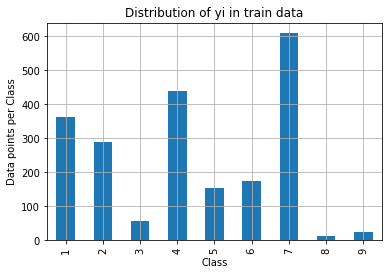

Number of data points in class 9 : 9 ( 0.424 %)
Number of data points in class 8 : 8 ( 0.377 %)
Number of data points in class 7 : 7 ( 0.33 %)
Number of data points in class 6 : 6 ( 0.282 %)
Number of data points in class 5 : 5 ( 0.235 %)
Number of data points in class 4 : 4 ( 0.188 %)
Number of data points in class 3 : 3 ( 0.141 %)
Number of data points in class 2 : 2 ( 0.094 %)
Number of data points in class 1 : 1 ( 0.047 %)
--------------------------------------------------------------------------------


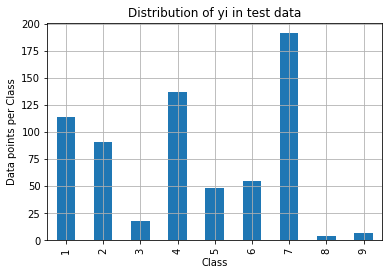

Number of data points in class 9 : 9 ( 1.353 %)
Number of data points in class 8 : 8 ( 1.203 %)
Number of data points in class 7 : 7 ( 1.053 %)
Number of data points in class 6 : 6 ( 0.902 %)
Number of data points in class 5 : 5 ( 0.752 %)
Number of data points in class 4 : 4 ( 0.602 %)
Number of data points in class 3 : 3 ( 0.451 %)
Number of data points in class 2 : 2 ( 0.301 %)
Number of data points in class 1 : 1 ( 0.15 %)
--------------------------------------------------------------------------------


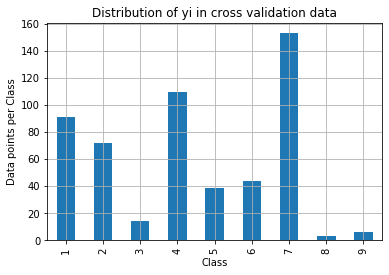

Number of data points in class 9 : 9 ( 1.692 %)
Number of data points in class 8 : 8 ( 1.504 %)
Number of data points in class 7 : 7 ( 1.316 %)
Number of data points in class 6 : 6 ( 1.128 %)
Number of data points in class 5 : 5 ( 0.94 %)
Number of data points in class 4 : 4 ( 0.752 %)
Number of data points in class 3 : 3 ( 0.564 %)
Number of data points in class 2 : 2 ( 0.376 %)
Number of data points in class 1 : 1 ( 0.188 %)


In [20]:
# it returns a dict, keys as class labels and index as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.index): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.index)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.index[i], '(', np.round((train_class_distribution.index[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.index): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.index)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.index[i], '(', np.round((test_class_distribution.index[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.index): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.index)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.index[i], '(', np.round((cv_class_distribution.index[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [21]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4792586561533487
Log loss on Test Data using Random Model 2.481093825805538
-------------------- Confusion matrix --------------------


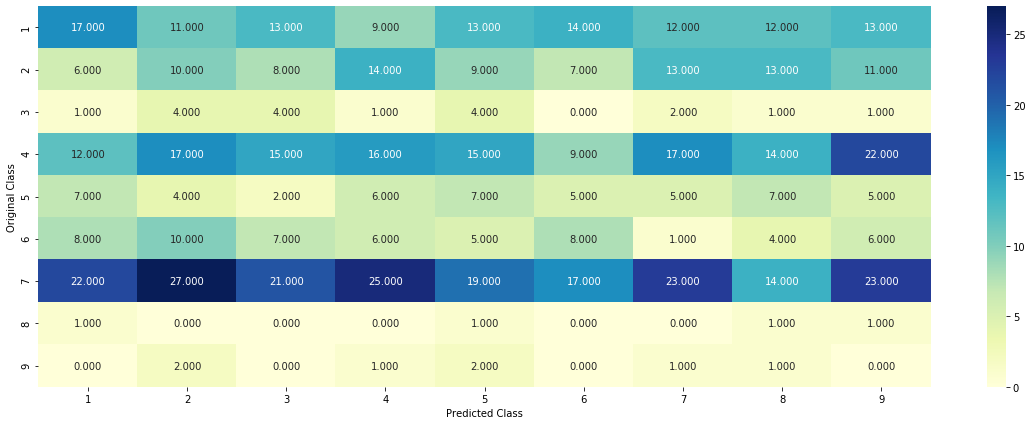

-------------------- Precision matrix (Columm Sum=1) --------------------


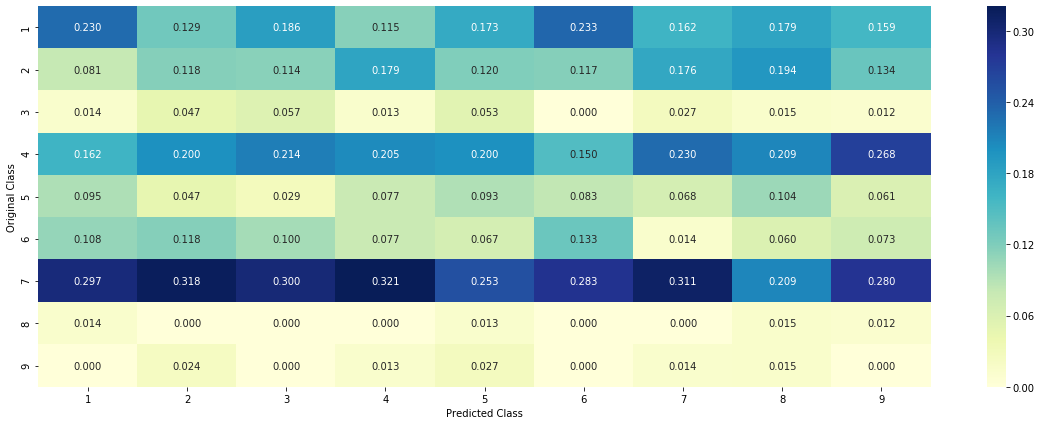

-------------------- Recall matrix (Row sum=1) --------------------


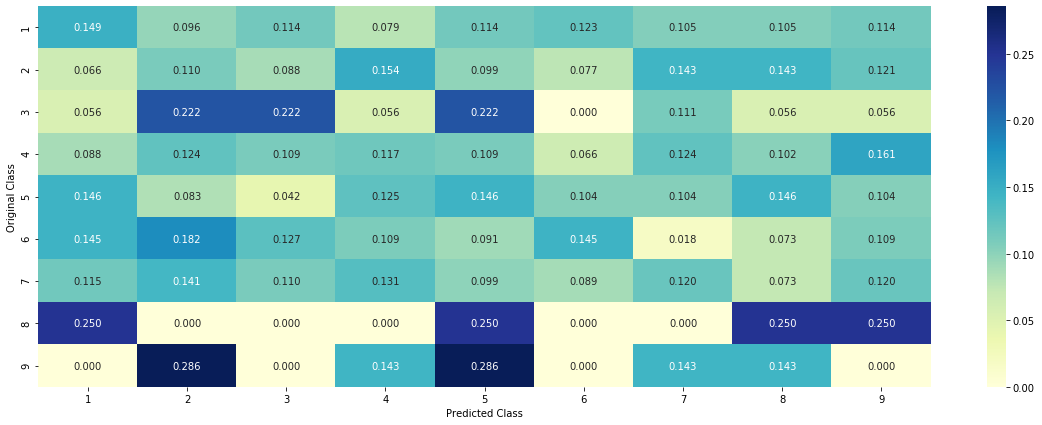

In [14]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [22]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [28]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 229
BRCA1     164
TP53       90
EGFR       88
PTEN       82
BRCA2      78
KIT        67
BRAF       51
ALK        48
ERBB2      46
PIK3CA     37
Name: Gene, dtype: int64


In [29]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 229 different categories of genes in the train data, and they are distibuted as follows


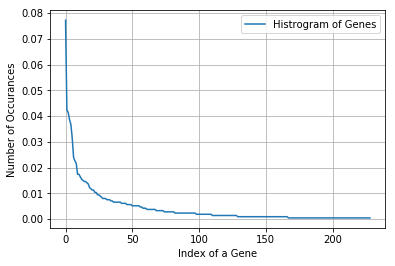

In [30]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


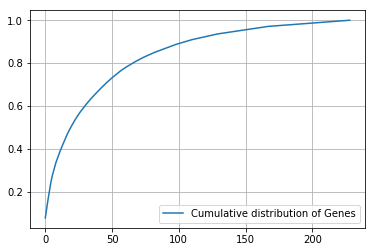

In [31]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

## Response Coding --  Gene Feature

In [55]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [17]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


## <font color = 'red'>One Hot Encoding -- Gene Feature

In [56]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
train_gene_feature_onehotCoding = normalize(train_gene_feature_onehotCoding,axis = 0)
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
test_gene_feature_onehotCoding = normalize(test_gene_feature_onehotCoding,axis = 0)
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])
cv_gene_feature_onehotCoding = normalize(cv_gene_feature_onehotCoding,axis = 0)

In [19]:
train_df['Gene'].head()

1894     MTOR
298     CHEK2
371      TP53
870     HLA-B
2478    BRCA1
Name: Gene, dtype: object

In [16]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 233)


## TFIDF Vectorizer -- Gene Feature

In [57]:
# tfidf based featurization on Gene Feature
gene_vectorizer_tf = TfidfVectorizer()
train_gene_feature_tfidf = gene_vectorizer_tf.fit_transform(train_df['Gene'])
train_gene_feature_tfidf =  normalize(train_gene_feature_tfidf,axis=0)
test_gene_feature_tfidf= gene_vectorizer_tf.transform(test_df['Gene'])
test_gene_feature_tfidf =  normalize(test_gene_feature_tfidf,axis=0)
cv_gene_feature_tfidf = gene_vectorizer_tf.transform(cv_df['Gene'])
cv_gene_feature_tfidf =  normalize(cv_gene_feature_tfidf,axis=0)

<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.418841767162939
For values of alpha =  0.0001 The log loss is: 1.2325868001617826
For values of alpha =  0.001 The log loss is: 1.2503129272158073
For values of alpha =  0.01 The log loss is: 1.360379976757511
For values of alpha =  0.1 The log loss is: 1.4314392521126913
For values of alpha =  1 The log loss is: 1.4659143358159061


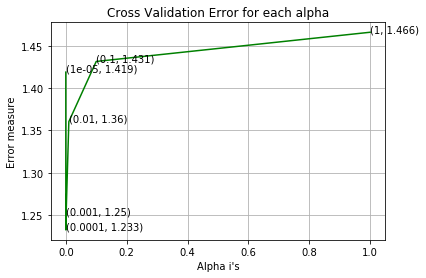

For values of best alpha =  0.0001 The train log loss is: 1.0425604300119806
For values of best alpha =  0.0001 The cross validation log loss is: 1.2325868001617826
For values of best alpha =  0.0001 The test log loss is: 1.200905436534172


In [38]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.



cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [39]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  229  genes in train dataset?
Ans
1. In test data 643 out of 665 : 96.69172932330827
2. In cross validation data 514 out of  532 : 96.61654135338345


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [40]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1924
Truncating_Mutations         59
Deletion                     49
Amplification                47
Fusions                      23
E17K                          3
Overexpression                3
Q22K                          2
Promoter_Hypermethylation     2
G13D                          2
T73I                          2
Name: Variation, dtype: int64


In [41]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1924 different categories of variations in the train data, and they are distibuted as follows


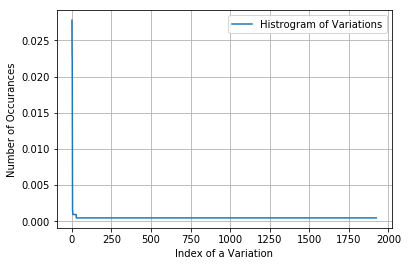

In [42]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02777778 0.05084746 0.07297552 ... 0.99905838 0.99952919 1.        ]


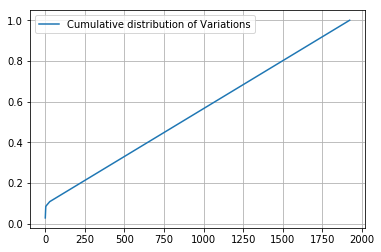

In [43]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

## Response Coding -- Variation Feature

In [58]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [25]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


## One Hot Encoding -- Variation Feature

In [59]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
train_variation_feature_onehotCoding = normalize(train_variation_feature_onehotCoding ,axis = 0)
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
test_variation_feature_onehotCoding = normalize(test_variation_feature_onehotCoding ,axis = 0)
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])
cv_variation_feature_onehotCoding = normalize(cv_variation_feature_onehotCoding ,axis = 0)

In [27]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1968)


## Tfidf Based Encoding -- Variation Feature

In [60]:
# tfidfi based featurization on variation feature.
variation_vectorizer_tf = TfidfVectorizer()
train_variation_feature_tfidf = variation_vectorizer_tf.fit_transform(train_df['Variation'])
train_variation_feature_tfidf = normalize(train_variation_feature_tfidf,axis = 0)
test_variation_feature_tfidf = variation_vectorizer_tf.transform(test_df['Variation'])
test_variation_feature_tfidf = normalize(test_variation_feature_tfidf,axis = 0)
cv_variation_feature_tfidf = variation_vectorizer_tf.transform(cv_df['Variation'])
cv_variation_feature_tfidf = normalize(cv_variation_feature_tfidf,axis = 0)

In [21]:
print("Train data shape after tfidf encoding: ",train_variation_feature_tfidf.shape)

Train data shape after tfidf encoding:  (2124, 1963)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7023621747765858
For values of alpha =  0.0001 The log loss is: 1.689842322110077
For values of alpha =  0.001 The log loss is: 1.6907130717518253
For values of alpha =  0.01 The log loss is: 1.7001345396142153
For values of alpha =  0.1 The log loss is: 1.7081826775989355
For values of alpha =  1 The log loss is: 1.710131025593559


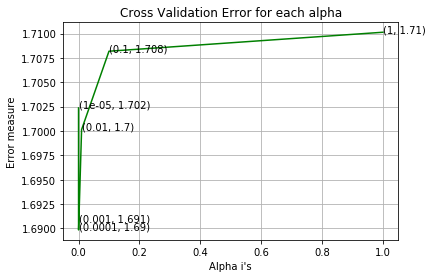

For values of best alpha =  0.0001 The train log loss is: 0.8255455900343496
For values of best alpha =  0.0001 The cross validation log loss is: 1.689842322110077
For values of best alpha =  0.0001 The test log loss is: 1.7362385768757977


In [48]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [49]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1924  genes in test and cross validation data sets?
Ans
1. In test data 64 out of 665 : 9.624060150375941
2. In cross validation data 56 out of  532 : 10.526315789473683


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [29]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [30]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [31]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


## Response Coding -- Text Based Features

In [61]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [62]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

## One Hot Encoding -- Text Based Feature with  unigrams

In [63]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3,)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52580


In [64]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [37]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [38]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({3: 5107, 4: 3294, 5: 3083, 6: 2457, 7: 2024, 8: 1861, 9: 1700, 12: 1314, 11: 1312, 10: 1171, 13: 1007, 14: 982, 16: 919, 15: 801, 18: 719, 20: 641, 19: 631, 17: 515, 22: 492, 21: 474, 24: 472, 27: 389, 28: 379, 23: 376, 26: 372, 25: 364, 45: 356, 31: 335, 30: 314, 39: 308, 32: 299, 36: 287, 29: 277, 33: 268, 35: 259, 40: 235, 34: 222, 42: 220, 37: 214, 38: 185, 41: 184, 46: 180, 48: 176, 44: 175, 50: 173, 54: 156, 47: 156, 43: 154, 57: 147, 56: 146, 52: 143, 60: 141, 55: 139, 49: 132, 51: 128, 70: 127, 53: 126, 58: 124, 62: 121, 64: 115, 61: 114, 63: 110, 69: 109, 59: 106, 72: 101, 79: 98, 66: 98, 65: 98, 78: 96, 90: 95, 75: 90, 84: 88, 71: 87, 68: 86, 80: 84, 81: 83, 87: 80, 82: 80, 77: 80, 74: 80, 73: 79, 67: 79, 85: 76, 108: 73, 97: 70, 91: 69, 96: 68, 89: 62, 99: 61, 88: 61, 83: 61, 120: 60, 111: 60, 100: 59, 93: 59, 104: 55, 92: 55, 76: 55, 95: 54, 106: 53, 101: 53, 86: 53, 105: 51, 113: 49, 98: 49, 140: 48, 122: 48, 103: 48, 135: 47, 112: 47, 136: 46, 94: 46, 110: 45, 10

## One Hot Encoding --  Text Feature using bigram

In [65]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer_bigram = CountVectorizer(min_df=3,ngram_range=(1,2),stop_words=stop_words,max_features=5000)
train_text_feature_onehot_bigram = text_vectorizer_bigram.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features_bigram= text_vectorizer_bigram.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts_bigram = train_text_feature_onehot_bigram.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict_bigram = dict(zip(list(train_text_features_bigram),train_text_fea_counts_bigram))


print("Total number of unique words in train data :", len(train_text_features_bigram))

Total number of unique words in train data : 5000


In [66]:
print("Our Bigram Features shape:",train_text_feature_onehot_bigram.shape)

Our Bigram Features shape: (2124, 5000)


## Normalizing Each vectors

In [67]:
# don't forget to normalize every feature
train_text_feature_onehot_bigram = normalize(train_text_feature_onehot_bigram, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehot_bigram = text_vectorizer_bigram.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehot_bigram = normalize(test_text_feature_onehot_bigram, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehot_bigram = text_vectorizer_bigram.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehot_bigram = normalize(cv_text_feature_onehot_bigram, axis=0)

In [160]:
train_df.head()

,ID,Gene,Variation,Class,TEXT
1461,1461,FGFR2,L770V,6,introduction melanoma lethal skin cancers amer...
1138,1138,MET,981_1028splice,7,non small cell lung cancer nsclc difficult dis...
895,895,PDGFRA,Y375_K455del,7,gene rearrangement form intragenic deletion pr...
793,793,ERBB4,Fusions,2,purpose identify druggable oncogenic fusions i...
1852,1852,CTCF,R339W,9,introduction ctcf originally identified zf 3 p...


## Tfidf Based Encoding --  Text Feature

In [68]:
# tfidfi based featurization on Text feature.
from sklearn.feature_selection import SelectKBest,chi2,f_classif
text_vectorizer_tf = TfidfVectorizer(stop_words=stop_words,ngram_range = (1,2),max_features=5000)
train_text_feature_tfidf = text_vectorizer_tf.fit_transform(train_df['TEXT'])
train_text_feature_tfidf = normalize(train_text_feature_tfidf,axis = 0)
test_text_feature_tfidf = text_vectorizer_tf.transform(test_df['TEXT'])
test_text_feature_tfidf = normalize(test_text_feature_tfidf,axis = 0)
cv_text_feature_tfidf = text_vectorizer_tf.transform(cv_df['TEXT'])
cv_text_feature_tfidf = normalize(cv_text_feature_tfidf,axis = 0)

In [69]:
df_fea = SelectKBest(chi2,k=1000).fit(train_text_feature_tfidf,y_train)
train_text_feature_tfidf_red = df_fea.transform(train_text_feature_tfidf)
test_text_feature_tfidf_red = df_fea.transform(test_text_feature_tfidf)
cv_text_feature_tfidf_red = df_fea.transform(cv_text_feature_tfidf)

In [70]:
print(train_text_feature_tfidf_red.shape)
print(test_text_feature_tfidf_red.shape)
print(cv_text_feature_tfidf_red.shape)

(2124, 1000)
(665, 1000)
(532, 1000)


## Tfidf Based Encoding -- Bigram Text Feature

In [71]:
# tfidf based featurization on Text feature.
from sklearn.feature_selection import SelectKBest,chi2,f_classif
text_vectorizer_tf = TfidfVectorizer(stop_words=stop_words,ngram_range=(2,2))
train_text_feature_tfidf_bi = text_vectorizer_tf.fit_transform(train_df['TEXT'])
train_text_feature_tfidf_bi = normalize(train_text_feature_tfidf_bi,axis = 0)
test_text_feature_tfidf_bi = text_vectorizer_tf.transform(test_df['TEXT'])
test_text_feature_tfidf_bi = normalize(test_text_feature_tfidf_bi,axis = 0)
cv_text_feature_tfidf_bi = text_vectorizer_tf.transform(cv_df['TEXT'])
cv_text_feature_tfidf_bi = normalize(cv_text_feature_tfidf_bi,axis = 0)

In [72]:
df_fea = SelectKBest(chi2,k=2000).fit(train_text_feature_tfidf_bi,y_train)
train_text_feature_tfidf_bi = df_fea.transform(train_text_feature_tfidf_bi)
test_text_feature_tfidf_bi = df_fea.transform(test_text_feature_tfidf_bi)
cv_text_feature_tfidf_bi = df_fea.transform(cv_text_feature_tfidf_bi)

In [73]:
print(train_text_feature_tfidf_bi.shape)
print(test_text_feature_tfidf_bi.shape)
print(cv_text_feature_tfidf_bi.shape)

(2124, 2000)
(665, 2000)
(532, 2000)


In [55]:
# tfidf_trii based featurization on Text feature.
from sklearn.feature_selection import SelectKBest,chi2,f_classif
text_vectorizer_tf = TfidfVectorizer(stop_words=stop_words,ngram_range=(3,3))
train_text_feature_tfidf_tri = text_vectorizer_tf.fit_transform(train_df['TEXT'])
train_text_feature_tfidf_tri = normalize(train_text_feature_tfidf_tri,axis = 0)
test_text_feature_tfidf_tri = text_vectorizer_tf.transform(test_df['TEXT'])
test_text_feature_tfidf_tri = normalize(test_text_feature_tfidf_tri,axis = 0)
cv_text_feature_tfidf_tri = text_vectorizer_tf.transform(cv_df['TEXT'])
cv_text_feature_tfidf_tri = normalize(cv_text_feature_tfidf_tri,axis = 0)

In [56]:
df_fea = SelectKBest(chi2,k=2000).fit(train_text_feature_tfidf_tri,y_train)
train_text_feature_tfidf_tri = df_fea.transform(train_text_feature_tfidf_tri)
test_text_feature_tfidf_tri = df_fea.transform(test_text_feature_tfidf_tri)
cv_text_feature_tfidf_tri = df_fea.transform(cv_text_feature_tfidf_tri)

In [57]:
print(train_text_feature_tfidf_tri.shape)
print(test_text_feature_tfidf_tri.shape)
print(cv_text_feature_tfidf_tri.shape)

(2124, 2000)
(665, 2000)
(532, 2000)


## AvgW2V Featurization -- Text Feature

In [74]:
import pickle
with open("glove_vectors","rb") as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [75]:
## On train dataset
from tqdm import tqdm
avg_w2v_vectors_text_train = [];
for sentence in tqdm(train_df['TEXT']): 
    vector = np.zeros(300) 
    cnt_words =0; 
    for word in sentence.split(): 
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_train.append(vector)

print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))

100%|██████████████████████████████████████████████████████████████████████████████| 2124/2124 [08:21<00:00,  6.12it/s]


2124
300


In [76]:
## On cross-validation dataset
from tqdm import tqdm
avg_w2v_vectors_text_cv = [];
for sentence in tqdm(cv_df['TEXT']): 
    vector = np.zeros(300) 
    cnt_words =0; 
    for word in sentence.split(): 
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_cv.append(vector)

print(len(avg_w2v_vectors_text_cv))
print(len(avg_w2v_vectors_text_cv[0]))

100%|████████████████████████████████████████████████████████████████████████████████| 532/532 [01:38<00:00,  4.08it/s]


532
300


In [77]:
## On test dataset
from tqdm import tqdm
avg_w2v_vectors_text_test = [];
for sentence in tqdm(test_df['TEXT']): 
    vector = np.zeros(300) 
    cnt_words =0; 
    for word in sentence.split(): 
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_test.append(vector)

print(len(avg_w2v_vectors_text_test))
print(len(avg_w2v_vectors_text_test[0]))

100%|████████████████████████████████████████████████████████████████████████████████| 665/665 [02:33<00:00,  4.75it/s]


665
300


In [100]:
train_df.to_csv("train_df")
test_df.to_csv("test_df")
cv_df.to_csv("cv_df")

## TfidfW2V Featurization -- Text Feature

In [101]:
text_vectorizer_tf = TfidfVectorizer(stop_words=stop_words)
train_text_feature_tfidf = text_vectorizer_tf.fit_transform(train_df['TEXT'])
tfidf_words = set(text_vectorizer_tf.get_feature_names())
dictionary = dict(zip(text_vectorizer_tf.get_feature_names(),list(text_vectorizer_tf.idf_)))

### Training Dataset.

In [102]:
# On training Dataset

tfidf_w2v_vectors_text_train= []
for sentence in tqdm(train_df['TEXT']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_text_train.append(vector)
print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))

100%|████████████████████████████████████████████████████████████████████████████| 2124/2124 [2:12:51<00:00,  2.78s/it]


2124
300


In [103]:
np.save("train_text_w2v",tfidf_w2v_vectors_text_train)

In [78]:
tfidf_w2v_vectors_text_train = np.load("train_text_w2v.npy")
tfidf_w2v_vectors_text_train = np.array(tfidf_w2v_vectors_text_train)

### Test Dataset

In [104]:
# On test Dataset
#dictionary = dict(zip(text_vectorizer_tf.get_feature_names(),list(text_vectorizer_tf.idf_)))
tfidf_w2v_vectors_text_test= []
for sentence in tqdm(test_df['TEXT']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_text_test.append(vector)
print(len(tfidf_w2v_vectors_text_test))
print(len(tfidf_w2v_vectors_text_test[0]))

100%|████████████████████████████████████████████████████████████████████████████████| 665/665 [39:44<00:00,  3.15s/it]


665
300


In [105]:
np.save("test_text_w2v",tfidf_w2v_vectors_text_test)

In [79]:
tfidf_w2v_vectors_text_test = np.load("test_text_w2v.npy")
tfidf_w2v_vectors_text_test = np.array(tfidf_w2v_vectors_text_test)

### CV Dataset.

In [106]:
# On Cross-validation Dataset.
#dictionary = dict(zip(text_vectorizer_tf.get_feature_names(),list(text_vectorizer_tf.idf_)))
tfidf_w2v_vectors_text_cv= []
for sentence in tqdm(cv_df['TEXT']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_text_cv.append(vector)
print(len(tfidf_w2v_vectors_text_cv))
print(len(tfidf_w2v_vectors_text_cv[0]))

100%|████████████████████████████████████████████████████████████████████████████████| 532/532 [36:04<00:00,  7.57s/it]


532
300


In [107]:
np.save("cv_text_w2v",tfidf_w2v_vectors_text_cv)

In [80]:
tfidf_w2v_vectors_text_cv = np.load("cv_text_w2v.npy")
tfidf_w2v_vectors_text_cv = np.array(tfidf_w2v_vectors_text_cv)

### Model on only Text features.

For values of alpha =  1e-05 The log loss is: 1.4798785760828574
For values of alpha =  0.0001 The log loss is: 1.4534937808292785
For values of alpha =  0.001 The log loss is: 1.3062465612808916
For values of alpha =  0.01 The log loss is: 1.4138930975129917
For values of alpha =  0.1 The log loss is: 1.5031084843525189
For values of alpha =  1 The log loss is: 1.6391636597237738


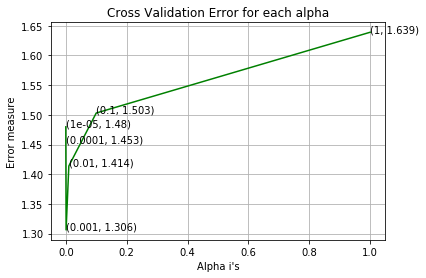

For values of best alpha =  0.001 The train log loss is: 0.7614133457365512
For values of best alpha =  0.001 The cross validation log loss is: 1.3062465612808916
For values of best alpha =  0.001 The test log loss is: 1.1902669954542044


In [59]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [63]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2


In [64]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.123 % of word of test data appeared in train data
97.188 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [81]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [82]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [83]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer()
    var_count_vec = TfidfVectorizer()
    text_count_vec = TfidfVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [103]:
train_x_combined_feat = np.column_stack((train_df["Text_Count"].values,train_df['Char_Count'].values,train_df['Avg_Count'].values))
test_x_combined_feat = np.column_stack((test_df["Text_Count"].values,test_df['Char_Count'].values,test_df['Avg_Count'].values))
cv_x_combined_feat = np.column_stack((cv_df["Text_Count"].values,cv_df['Char_Count'].values,cv_df['Avg_Count'].values))
train_y = train_df['Class'].values
test_y = test_df['Class'].values
cv_y = cv_df['Class'].values

In [101]:
train_df.columns

Index(['Unnamed: 0', 'ID', 'Gene', 'Variation', 'Class', 'TEXT', 'Text_Count',
       'Char_Count', 'Avg_Count', 'Gene_Share', 'Variation_Share'],
      dtype='object')

In [104]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_tfidf = hstack((train_gene_feature_tfidf,train_variation_feature_tfidf,train_x_combined_feat))
test_gene_var_tfidf = hstack((test_gene_feature_tfidf,test_variation_feature_tfidf,test_x_combined_feat))
cv_gene_var_tfidf = hstack((cv_gene_feature_tfidf,cv_variation_feature_tfidf,cv_x_combined_feat))

train_x_tfidf = hstack((train_gene_var_tfidf, train_text_feature_tfidf_bi)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_tfidf = hstack((test_gene_var_tfidf, test_text_feature_tfidf_bi)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_tfidf = hstack((cv_gene_var_tfidf, cv_text_feature_tfidf_bi)).tocsr()
cv_y = np.array(list(cv_df['Class']))




train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding,train_x_combined_feat))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding,test_x_combined_feat))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding,cv_x_combined_feat))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))




In [208]:
print("TFIDF features :")
print("(number of data points * number of features) in train data = ", train_x_tfidf.shape)
print("(number of data points * number of features) in test data = ", test_x_tfidf.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_tfidf.shape)

TFIDF features :
(number of data points * number of features) in train data =  (2124, 4201)
(number of data points * number of features) in test data =  (665, 4201)
(number of data points * number of features) in cross validation data = (532, 4201)


In [209]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 32)
(number of data points * number of features) in test data =  (665, 32)
(number of data points * number of features) in cross validation data = (532, 32)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.4227214827230046
for alpha = 0.0001
Log Loss : 1.4209423391532983
for alpha = 0.001
Log Loss : 1.4108975310069267
for alpha = 0.1
Log Loss : 1.3574685942385876
for alpha = 1
Log Loss : 1.3067804668849965
for alpha = 10
Log Loss : 1.363024308093528
for alpha = 100
Log Loss : 1.406349176011432
for alpha = 1000
Log Loss : 1.355186448279098


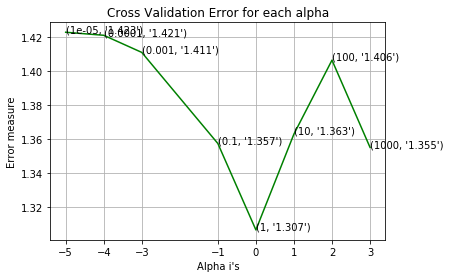

For values of best alpha =  1 The train log loss is: 0.3866190238782808
For values of best alpha =  1 The cross validation log loss is: 1.3067804668849965
For values of best alpha =  1 The test log loss is: 1.274915504286139


In [214]:


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_tfidf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)


predict_y = sig_clf.predict_proba(train_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.209378185107098
Number of missclassified point : 0.42857142857142855
-------------------- Confusion matrix --------------------


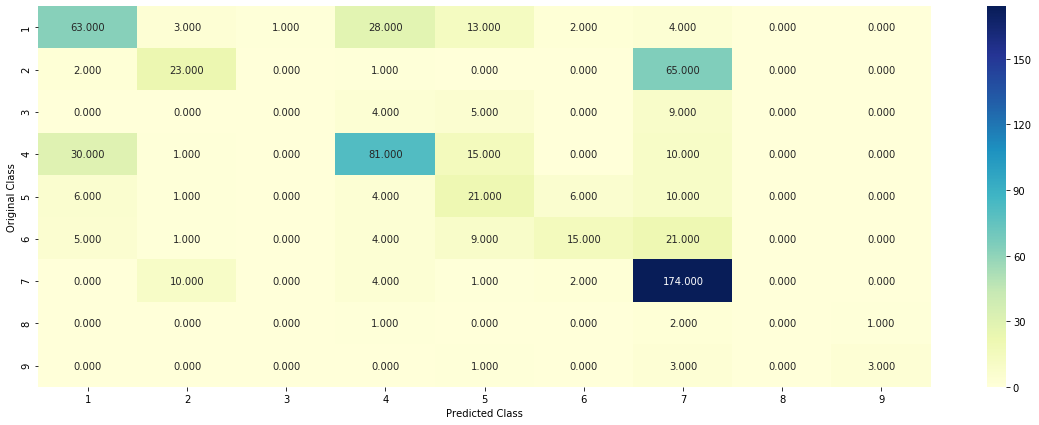

-------------------- Precision matrix (Columm Sum=1) --------------------


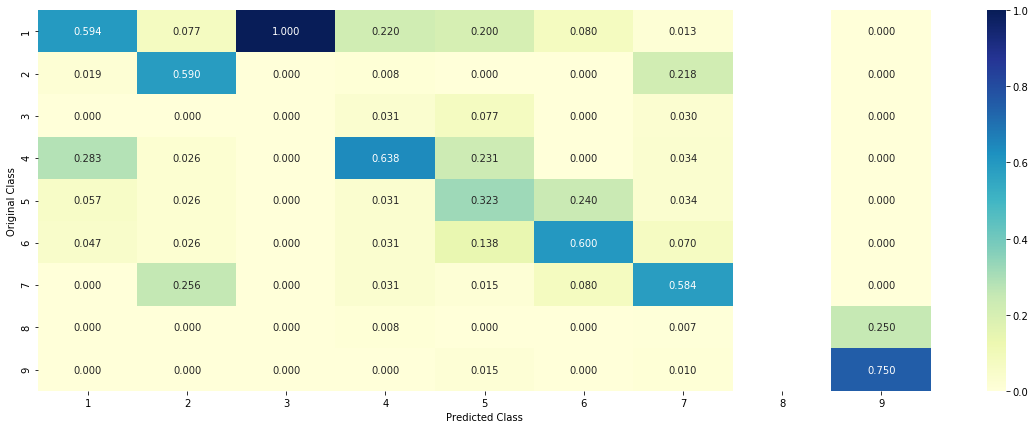

-------------------- Recall matrix (Row sum=1) --------------------


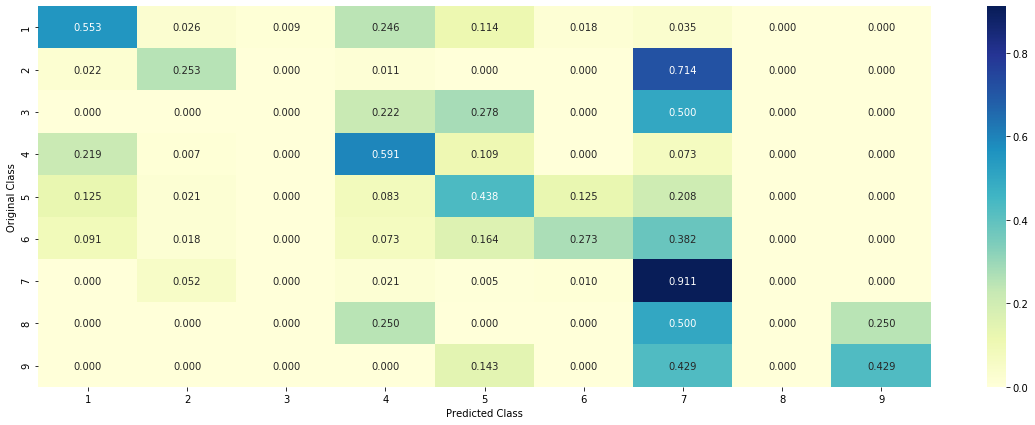

In [73]:


clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_tfidf)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(test_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(test_x_tfidf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y, sig_clf.predict(test_x_tfidf.toarray()))

In [99]:
sig_clf.predict(test_x_tfidf[:10])

array([7, 7, 4, 7, 4, 7, 4, 5, 2, 1])

In [98]:
test_y[:10]

array([7, 2, 1, 7, 4, 7, 6, 5, 2, 4])

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [100]:
test_point_index = 3
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0784 0.0632 0.0119 0.0789 0.0403 0.0397 0.6779 0.0051 0.0046]]
Actual Class : 7
--------------------------------------------------
43 Text feature [592] present in test data point [True]
71 Text feature [3e] present in test data point [True]
89 Text feature [103] present in test data point [True]
Out of the top  100  features  3 are present in query point


<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [101]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0893 0.2781 0.0135 0.1071 0.0457 0.0456 0.4095 0.0058 0.0053]]
Actual Class : 2
--------------------------------------------------
20 Text feature [73] present in test data point [True]
89 Text feature [103] present in test data point [True]
Out of the top  100  features  2 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 1
Log Loss : 1.3026749739050825
for alpha = 3
Log Loss : 1.1109197106350854
for alpha = 5
Log Loss : 1.0531296180258323
for alpha = 11
Log Loss : 1.068303760541548
for alpha = 15
Log Loss : 1.091919159590209
for alpha = 21
Log Loss : 1.0910835168454185
for alpha = 31
Log Loss : 1.0947083214726603
for alpha = 41
Log Loss : 1.1096426226103424
for alpha = 51
Log Loss : 1.1251171078440214
for alpha = 99
Log Loss : 1.1604809509764227


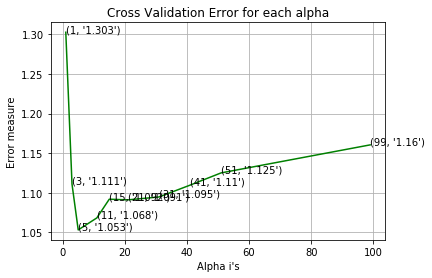

For values of best alpha =  5 The train log loss is: 0.5053239607934329
For values of best alpha =  5 The cross validation log loss is: 1.0531296180258323
For values of best alpha =  5 The test log loss is: 1.0685424740831966


In [213]:


alpha = [1,3,5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0204258381799634
Number of mis-classified points : 0.34887218045112783
-------------------- Confusion matrix --------------------


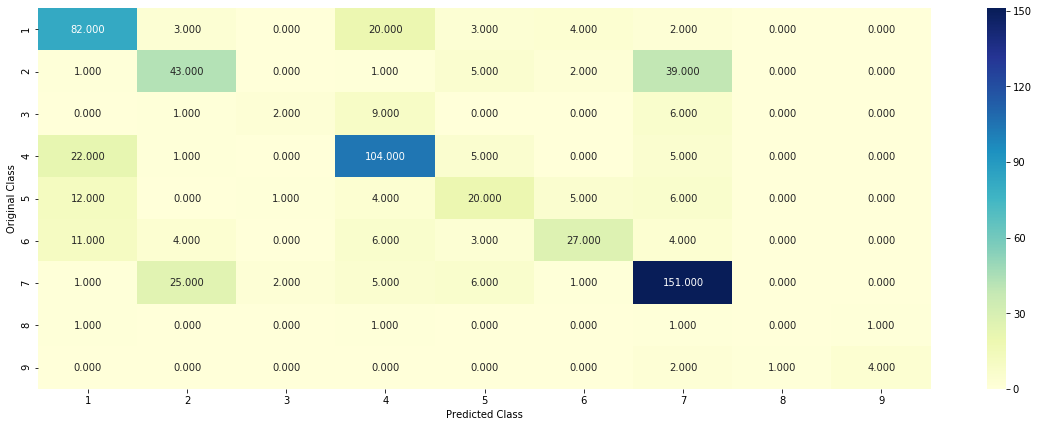

-------------------- Precision matrix (Columm Sum=1) --------------------


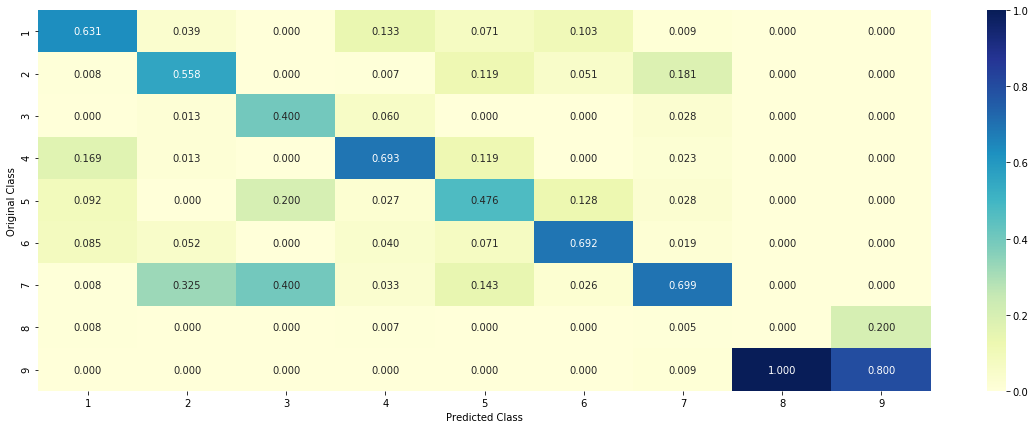

-------------------- Recall matrix (Row sum=1) --------------------


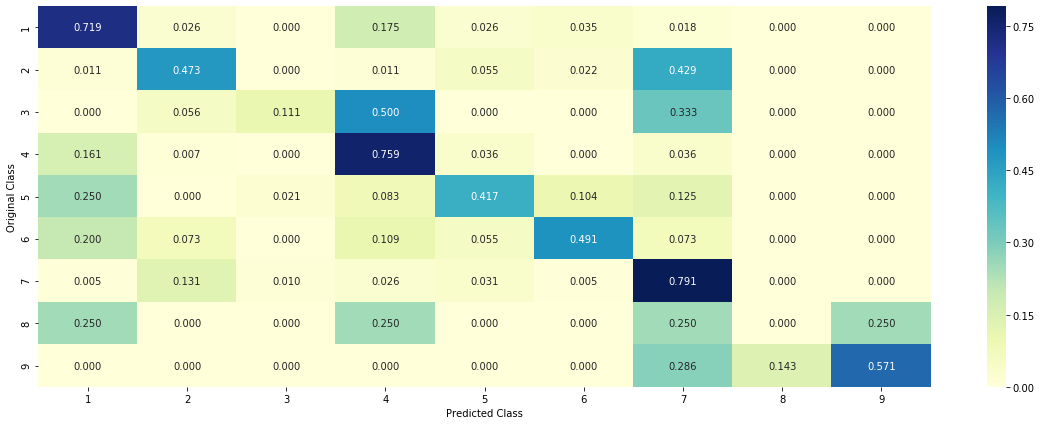

In [104]:

clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, test_x_responseCoding, test_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [105]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 2
The  11  nearest neighbours of the test points belongs to classes [2 2 2 2 2 7 7 2 7 7 2]
Fequency of nearest points : Counter({2: 7, 7: 4})


<h3>4.2.4. Sample Query Point-2 </h3>

In [106]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 2
the k value for knn is 11 and the nearest neighbours of the test points belongs to classes [7 7 2 7 7 7 7 7 4 2 2]
Fequency of nearest points : Counter({7: 7, 2: 3, 4: 1})


<h2>4.3. Logistic Regression</h2>

In [150]:
from scipy.sparse import csr_matrix
train_gene_var_onehot = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding,train_x_combined_feat))
test_gene_var_onehot = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding,test_x_combined_feat))
cv_gene_var_onehot = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding,cv_x_combined_feat))

train_x_bigram = hstack((train_gene_var_onehot ,train_text_feature_onehot_bigram,train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_bigram = hstack((test_gene_var_onehot,test_text_feature_onehot_bigram,test_text_feature_onehotCoding )).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_bigram = hstack((cv_gene_var_onehot,cv_text_feature_onehot_bigram,cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

train_x_bi_resposeCoding = hstack((train_x_responseCoding,train_text_feature_onehotCoding,train_text_feature_responseCoding)).tocsr()
test_x_bi_resposeCoding = hstack((test_x_responseCoding,test_text_feature_onehotCoding,test_text_feature_responseCoding)).tocsr()
cv_x_bi_resposeCoding = hstack((cv_x_responseCoding,cv_text_feature_onehotCoding,cv_text_feature_responseCoding)).tocsr()

In [231]:
print("train dataset for logistic regression:",train_x_bigram.shape)
print("test dataset for logistic regression:",test_x_bigram.shape)
print("cv dataset for logistic regression:",cv_x_bigram.shape)

train dataset for logistic regression: (2124, 59781)
test dataset for logistic regression: (665, 59781)
cv dataset for logistic regression: (532, 59781)


In [151]:
print("train dataset for logistic regression:",train_x_bi_resposeCoding.shape)
print("test dataset for logistic regression:",test_x_bi_resposeCoding.shape)
print("cv dataset for logistic regression:",cv_x_bi_resposeCoding.shape)

train dataset for logistic regression: (2124, 52619)
test dataset for logistic regression: (665, 52619)
cv dataset for logistic regression: (532, 52619)


<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.3361525067126903
for alpha = 1e-05
Log Loss : 1.3355655680654164
for alpha = 0.0001
Log Loss : 1.1852561150550387
for alpha = 0.001
Log Loss : 1.1756167094567433
for alpha = 0.002
Log Loss : 1.1972459251106078
for alpha = 0.005
Log Loss : 1.2364754485143028
for alpha = 0.008
Log Loss : 1.2584232684409333
for alpha = 0.01
Log Loss : 1.268552670200021
for alpha = 0.1
Log Loss : 1.6000383869963282


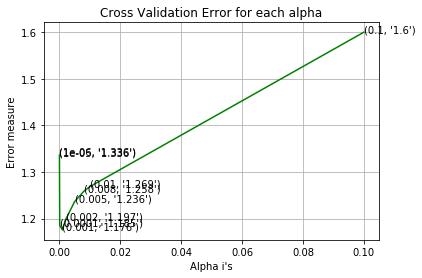

For values of best alpha =  0.001 The train log loss is: 0.6336285362938
For values of best alpha =  0.001 The cross validation log loss is: 1.1756167094567433
For values of best alpha =  0.001 The test log loss is: 1.2091431207158418


In [160]:


alpha = [1e-6,1e-5,1e-4,1e-3,2e-3,5e-3,8e-3,1e-2,1e-1]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_bigram, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_bigram, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_bigram)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_bigram, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_bigram, train_y)

predict_y = sig_clf.predict_proba(train_x_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(test_y, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.2091431207158418
Number of mis-classified points : 0.4045112781954887
-------------------- Confusion matrix --------------------


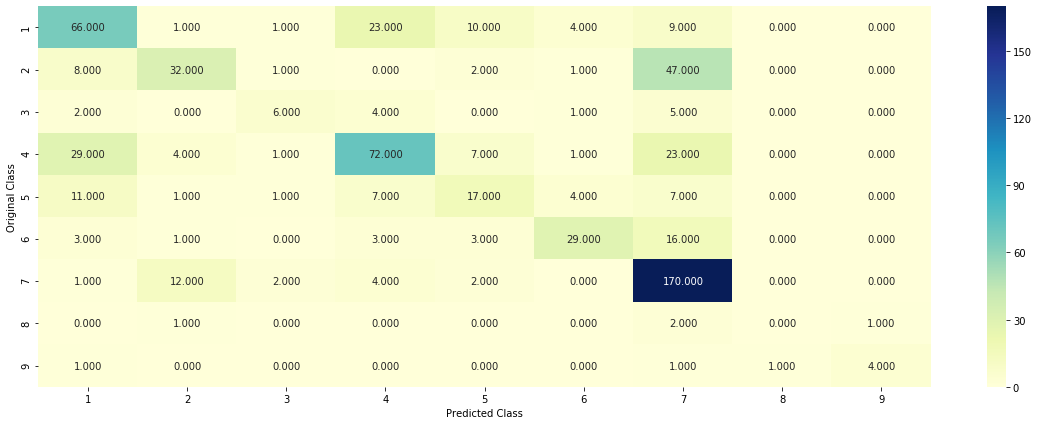

-------------------- Precision matrix (Columm Sum=1) --------------------


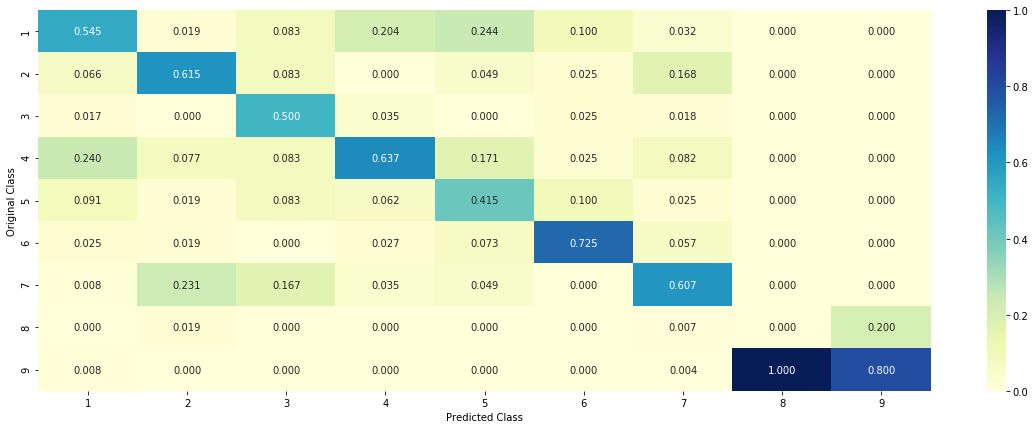

-------------------- Recall matrix (Row sum=1) --------------------


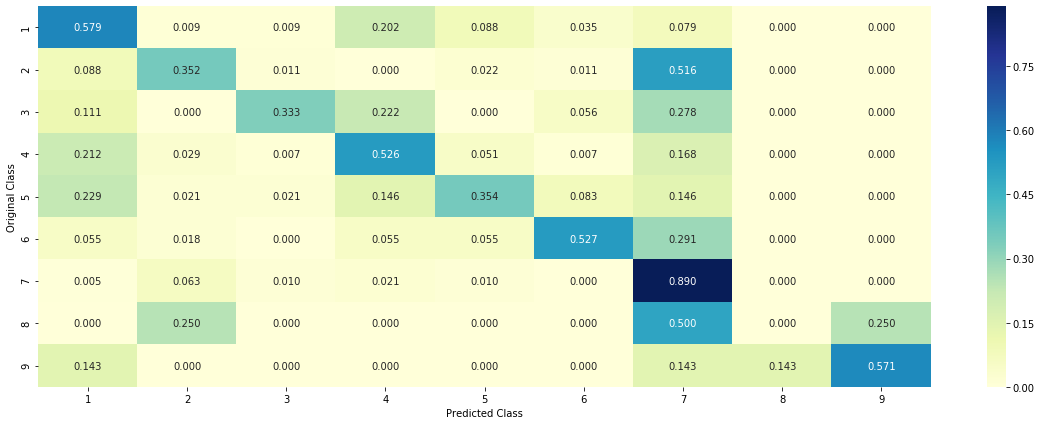

In [161]:

#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_bigram, train_y, test_x_bigram, test_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [78]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

In [135]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
def get_impfeature_names_lr(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3,ngram_range=(2,2))
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            bigrams = []
            for sentence in text:
                sequence = word_tokenize(sentence) 
                bigrams.extend(list(ngrams(sequence, 2)))
            bigram_word = []
            for i in bigrams:
                bigram_word.append(' '.join(i))
            yes_no = True if word in bigram_word else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [136]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_bigram,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_bigram[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_bigram[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_lr(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0755 0.5805 0.0112 0.0693 0.0379 0.0227 0.1933 0.0054 0.0041]]
Actual Class : 2
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [137]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_bigram[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_bigram[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_lr(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1295 0.1259 0.0118 0.3091 0.0461 0.0241 0.3435 0.0054 0.0045]]
Actual Class : 2
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 0.001
Log Loss : 1.1823358985559334
for alpha = 0.002
Log Loss : 1.1570124986563164
for alpha = 0.003
Log Loss : 1.1444619289579594
for alpha = 0.005
Log Loss : 1.1391900440554619
for alpha = 0.008
Log Loss : 1.1390764326945244
for alpha = 0.01
Log Loss : 1.1379309546088026
for alpha = 0.02
Log Loss : 1.13778296053578
for alpha = 0.04
Log Loss : 1.140752401032203
for alpha = 0.07
Log Loss : 1.1465128270891174
for alpha = 0.09
Log Loss : 1.151199316955839
for alpha = 0.1
Log Loss : 1.1533356114821187
for alpha = 0.2
Log Loss : 1.1736757350976663
for alpha = 0.5
Log Loss : 1.213919780227564
for alpha = 0.6
Log Loss : 1.2236949340489633


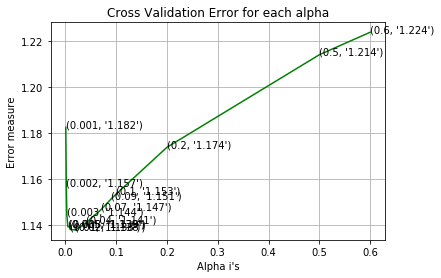

For values of best alpha =  0.02 The train log loss is: 0.6878431759793358
For values of best alpha =  0.02 The cross validation log loss is: 1.13778296053578
For values of best alpha =  0.02 The test log loss is: 1.1801971216617853


In [146]:


alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_bigram, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_bigram, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_bigram)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_bigram, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_bigram, train_y)

predict_y = sig_clf.predict_proba(train_x_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.2521811628755943
Number of mis-classified points : 0.37218045112781956
-------------------- Confusion matrix --------------------


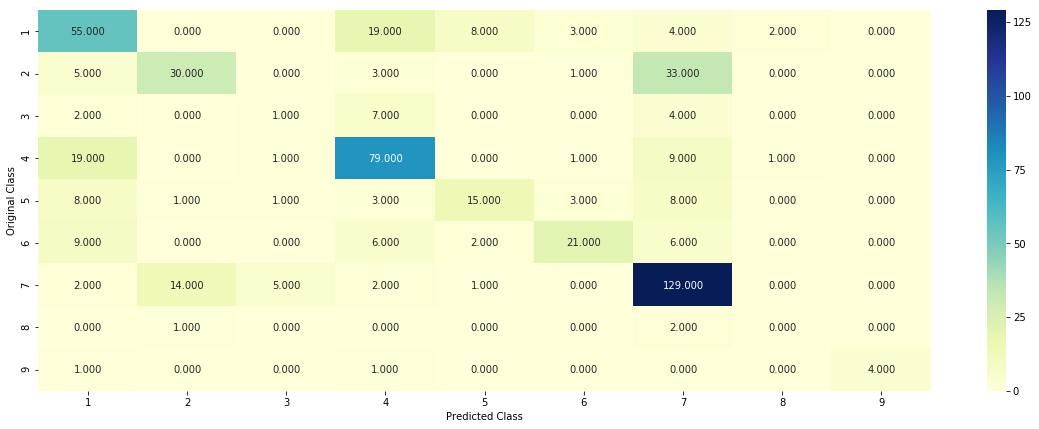

-------------------- Precision matrix (Columm Sum=1) --------------------


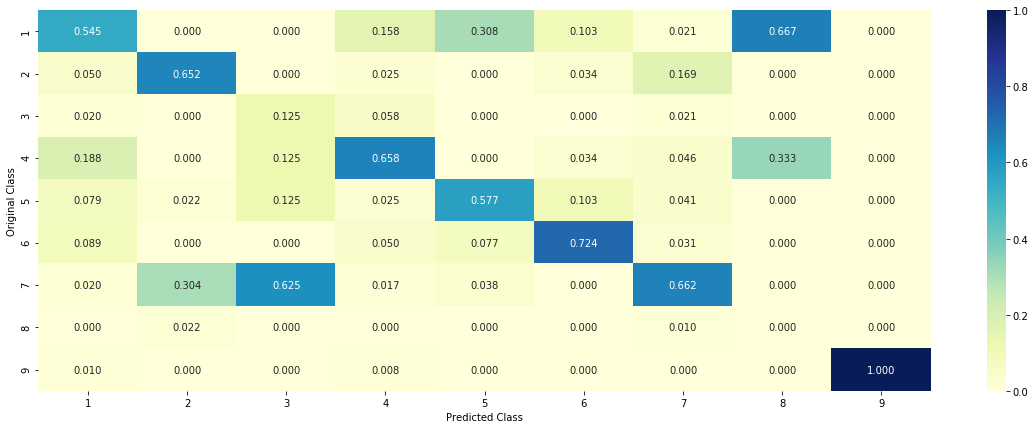

-------------------- Recall matrix (Row sum=1) --------------------


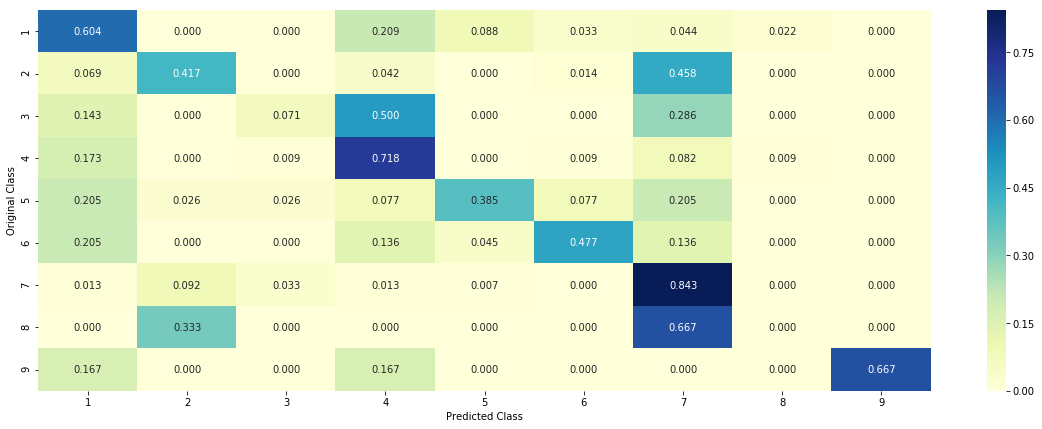

In [82]:


clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [83]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[5.100e-03 1.255e-01 2.000e-04 1.300e-03 2.300e-03 1.400e-03 8.556e-01
  8.500e-03 1.000e-04]]
Actual Class : 7
--------------------------------------------------
60 Text feature [constitutively] present in test data point [True]
107 Text feature [flt1] present in test data point [True]
124 Text feature [cysteine] present in test data point [True]
157 Text feature [oncogenes] present in test data point [True]
158 Text feature [inhibited] present in test data point [True]
195 Text feature [activating] present in test data point [True]
200 Text feature [ligand] present in test data point [True]
203 Text feature [oncogene] present in test data point [True]
204 Text feature [technology] present in test data point [True]
257 Text feature [gaiix] present in test data point [True]
260 Text feature [concentrations] present in test data point [True]
265 Text feature [downstream] present in test data point [True]
314 Text feature [hki] present 

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [84]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0485 0.1851 0.0052 0.0442 0.0617 0.0143 0.6317 0.0072 0.0022]]
Actual Class : 7
--------------------------------------------------
60 Text feature [constitutively] present in test data point [True]
89 Text feature [constitutive] present in test data point [True]
116 Text feature [activated] present in test data point [True]
158 Text feature [inhibited] present in test data point [True]
159 Text feature [transforming] present in test data point [True]
193 Text feature [receptors] present in test data point [True]
195 Text feature [activating] present in test data point [True]
203 Text feature [oncogene] present in test data point [True]
226 Text feature [transform] present in test data point [True]
241 Text feature [isozyme] present in test data point [True]
265 Text feature [downstream] present in test data point [True]
377 Text feature [agar] present in test data point [True]
442 Text feature [interatomic] present in test data poi

<h2>4.4. Linear Support Vector Machines</h2>

In [146]:
train_gene_var_tfidf = hstack((train_gene_feature_tfidf,train_variation_feature_tfidf))
test_gene_var_tfidf = hstack((test_gene_feature_tfidf,test_variation_feature_tfidf))
cv_gene_var_tfidf = hstack((cv_gene_feature_tfidf,cv_variation_feature_tfidf))

train_x_tfidf = hstack((train_gene_var_tfidf,train_text_feature_tfidf )).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_tfidf = hstack((test_gene_var_tfidf, test_text_feature_tfidf)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_tfidf = hstack((cv_gene_var_tfidf, cv_text_feature_tfidf)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [147]:
train_x_tfidf.shape

(2124, 7196)

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-06
Log Loss : 1.1352542898053257
for C = 1e-05
Log Loss : 1.1047662413604011
for C = 0.0001
Log Loss : 1.0820811965755723
for C = 0.001
Log Loss : 1.0838816353613412
for C = 0.01
Log Loss : 1.2674591432469533
for C = 0.1
Log Loss : 1.8811712927511912
for C = 1
Log Loss : 1.8671668946367408
for C = 10
Log Loss : 1.8671669480393485
for C = 100
Log Loss : 1.8671669802971607


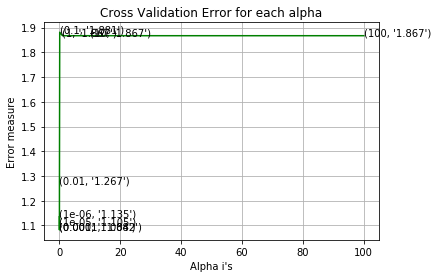

For values of best alpha =  0.0001 The train log loss is: 0.42755987169363696
For values of best alpha =  0.0001 The cross validation log loss is: 1.0820811965755723
For values of best alpha =  0.0001 The test log loss is: 1.1419422768290386


In [148]:


alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_tfidf, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidf, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(test_y, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.1419422768290386
Number of mis-classified points : 0.3819548872180451
-------------------- Confusion matrix --------------------


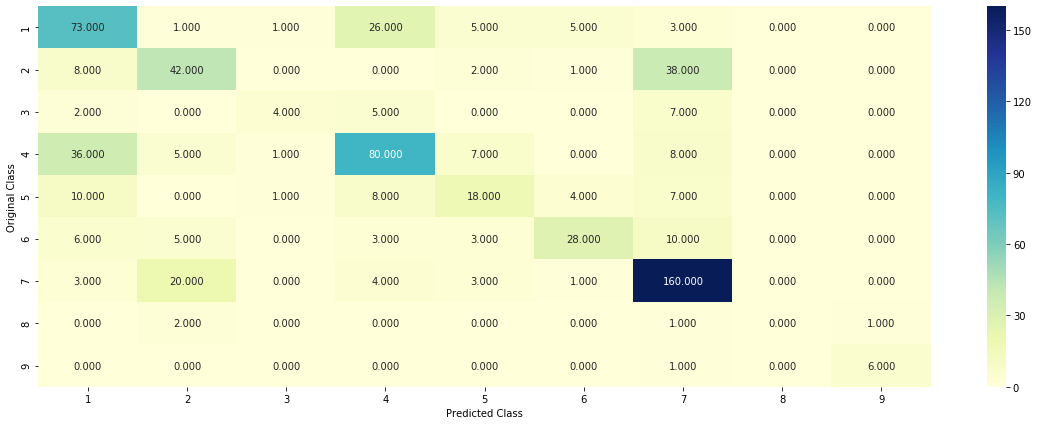

-------------------- Precision matrix (Columm Sum=1) --------------------


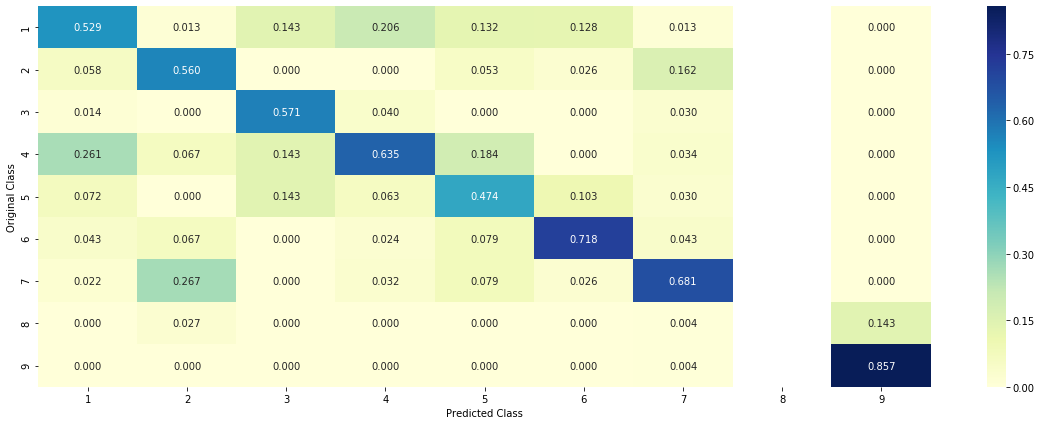

-------------------- Recall matrix (Row sum=1) --------------------


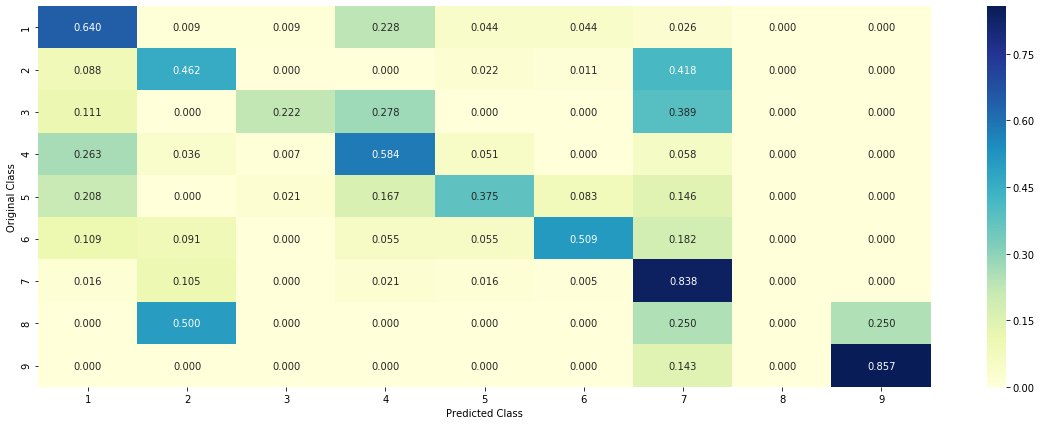

In [149]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_tfidf, train_y,test_x_tfidf,test_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [140]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidf,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2238 0.0906 0.0138 0.4324 0.0992 0.0385 0.0887 0.0057 0.0072]]
Actual Class : 4
--------------------------------------------------
464 Text feature [03] present in test data point [True]
Out of the top  500  features  1 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [141]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0748 0.2329 0.0052 0.1233 0.0888 0.0134 0.4456 0.0048 0.0112]]
Actual Class : 6
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [144]:


from tqdm import tqdm
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in tqdm(alpha):
    for j in tqdm(max_depth):
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_tfidf, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_tfidf, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_tfidf)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidf)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 100 and max depth =  5
Log Loss : 1.2698611761339547



 50%|██████████████████████████████████████████                                          | 1/2 [00:04<00:04,  4.19s/it]

for n_estimators = 100 and max depth =  10
Log Loss : 1.237021999126905



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 200 and max depth =  5
Log Loss : 1.2640477333395213



 50%|██████████████████████████████████████████                                          | 1/2 [00:04<00:04,  4.09s/it]

for n_estimators = 200 and max depth =  10
Log Loss : 1.235041204740813



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 500 and max depth =  5
Log Loss : 1.250188376890255



 50%|██████████████████████████████████████████                                          | 1/2 [00:08<00:08,  8.48s/it]

for n_estimators = 500 and max depth =  10
Log Loss : 1.2317614125132452



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 1000 and max depth =  5
Log Loss : 1.2532147545623946



 50%|██████████████████████████████████████████                                          | 1/2 [00:14<00:14, 14.14s/it]

for n_estimators = 1000 and max depth =  10
Log Loss : 1.2265443610191151



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

for n_estimators = 2000 and max depth =  5
Log Loss : 1.2530068778517107



 50%|██████████████████████████████████████████                                          | 1/2 [00:27<00:27, 27.09s/it]

for n_estimators = 2000 and max depth =  10
Log Loss : 1.2263679575612343



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:25<00:00, 49.42s/it]


For values of best estimator =  2000 The train log loss is: 0.5765340704615958
For values of best estimator =  2000 The cross validation log loss is: 1.2263679575612343
For values of best estimator =  2000 The test log loss is: 1.134327116595264


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.134327116595264
Number of mis-classified points : 0.3684210526315789
-------------------- Confusion matrix --------------------


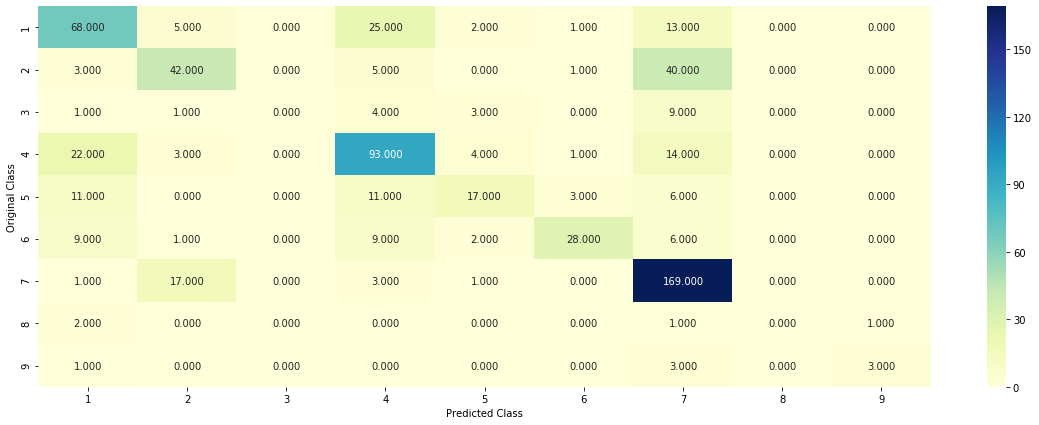

-------------------- Precision matrix (Columm Sum=1) --------------------


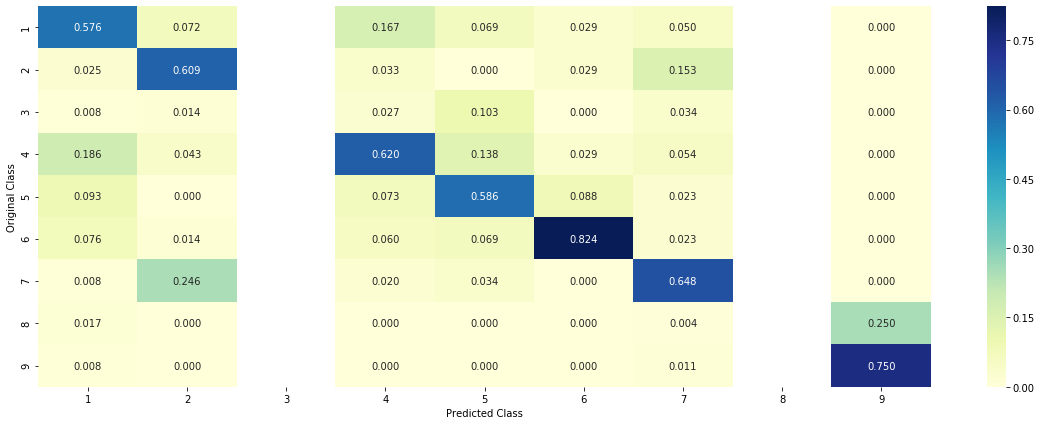

-------------------- Recall matrix (Row sum=1) --------------------


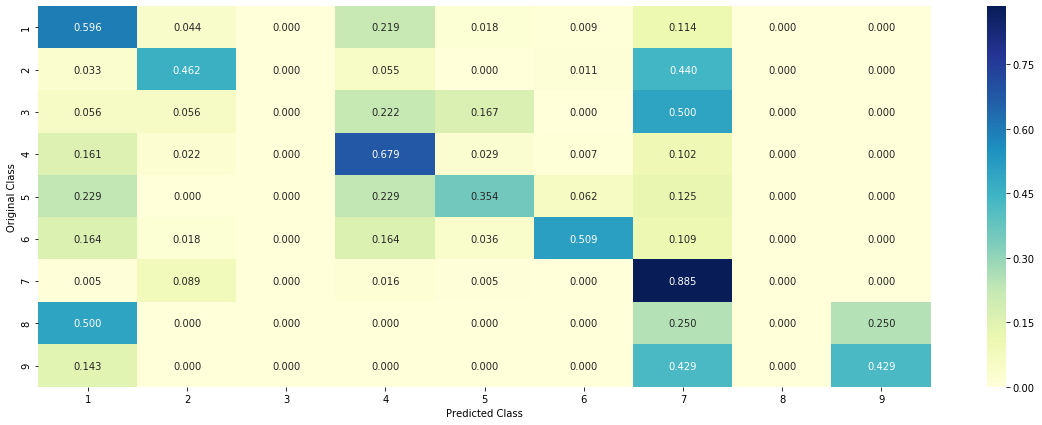

In [148]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_tfidf, train_y,test_x_tfidf,test_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [167]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tfidf, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidf, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0313 0.5032 0.0122 0.03   0.031  0.0302 0.3547 0.0044 0.0031]]
Actual Class : 2
--------------------------------------------------
4 Text feature [058] present in test data point [True]
46 Text feature [265] present in test data point [True]
Out of the top  100  features  2 are present in query point


<h4>4.5.3.2. Inorrectly Classified point</h4>

In [166]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidf[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidf[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1486 0.272  0.0214 0.1035 0.0715 0.0699 0.2979 0.0077 0.0074]]
Actuall Class : 2
--------------------------------------------------
18 Text feature [73] present in test data point [True]
82 Text feature [76] present in test data point [True]
Out of the top  100  features  2 are present in query point


<h3>4.5.3. Hyper paramter tuning (With AvgW2v vector)</h3>

In [239]:
from scipy.sparse import csr_matrix
train_gene_var_tfidf = hstack((train_gene_feature_tfidf,train_variation_feature_tfidf,train_x_combined_feat))
test_gene_var_tfidf = hstack((test_gene_feature_tfidf,test_variation_feature_tfidf,test_x_combined_feat))
cv_gene_var_tfidf = hstack((cv_gene_feature_tfidf,cv_variation_feature_tfidf,cv_x_combined_feat))

train_x_avgw2v = hstack((train_gene_var_tfidf, csr_matrix(avg_w2v_vectors_text_train),train_text_feature_tfidf_red)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_avgw2v = hstack((test_gene_var_tfidf, csr_matrix(avg_w2v_vectors_text_test),test_text_feature_tfidf_red)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_avgw2v = hstack((cv_gene_var_tfidf, csr_matrix(avg_w2v_vectors_text_cv),cv_text_feature_tfidf_red)).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [240]:
print("TRainig data shape:",train_x_avgw2v.shape)
print("Test data shape:",test_x_avgw2v.shape)
print("Cross-validation data shape:",cv_x_avgw2v.shape)

TRainig data shape: (2124, 3501)
Test data shape: (665, 3501)
Cross-validation data shape: (532, 3501)


In [241]:


alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,8,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_avgw2v, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_avgw2v, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_avgw2v)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/5)], criterion='gini', max_depth=max_depth[int(best_alpha%5)], random_state=42, n_jobs=-1)
clf.fit(train_x_avgw2v, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_avgw2v, train_y)

predict_y = sig_clf.predict_proba(train_x_avgw2v)
print('For values of best alpha = ', alpha[int(best_alpha/5)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_avgw2v)
print('For values of best alpha = ', alpha[int(best_alpha/5)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_avgw2v)
print('For values of best alpha = ', alpha[int(best_alpha/5)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.4988477563888711
for n_estimators = 10 and max depth =  3
Log Loss : 1.4341033996679167
for n_estimators = 10 and max depth =  5
Log Loss : 1.3437051446507582
for n_estimators = 10 and max depth =  8
Log Loss : 1.2706178539343524
for n_estimators = 10 and max depth =  10
Log Loss : 1.245097063861557
for n_estimators = 50 and max depth =  2
Log Loss : 1.416363796434323
for n_estimators = 50 and max depth =  3
Log Loss : 1.37173370715159
for n_estimators = 50 and max depth =  5
Log Loss : 1.2726954973303848
for n_estimators = 50 and max depth =  8
Log Loss : 1.2068348339335075
for n_estimators = 50 and max depth =  10
Log Loss : 1.1822213098694119
for n_estimators = 100 and max depth =  2
Log Loss : 1.4155904140369513
for n_estimators = 100 and max depth =  3
Log Loss : 1.3590210645950593
for n_estimators = 100 and max depth =  5
Log Loss : 1.2628261920531008
for n_estimators = 100 and max depth =  8
Log Loss : 1.188705943234664
for n

<h3>4.5.4. Testing model with best hyper parameters (AvgW2V)</h3>

Log loss : 1.1313383528477639
Number of mis-classified points : 0.37593984962406013
-------------------- Confusion matrix --------------------


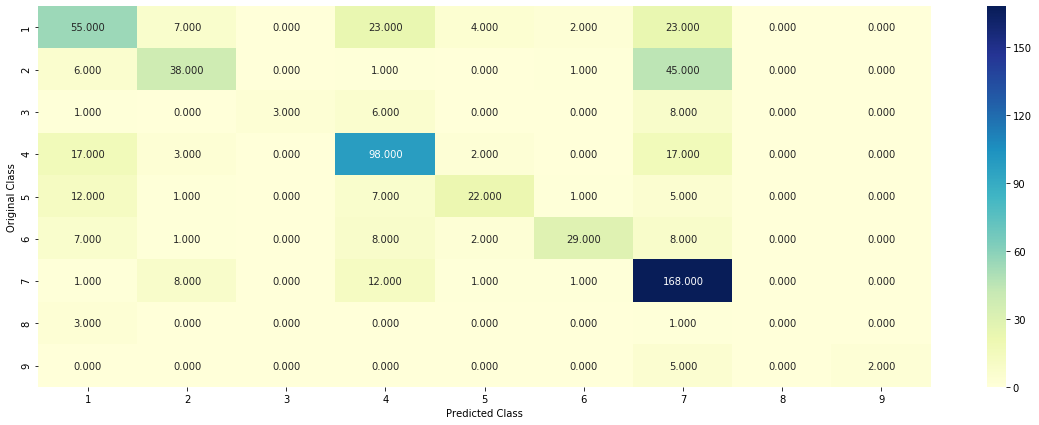

-------------------- Precision matrix (Columm Sum=1) --------------------


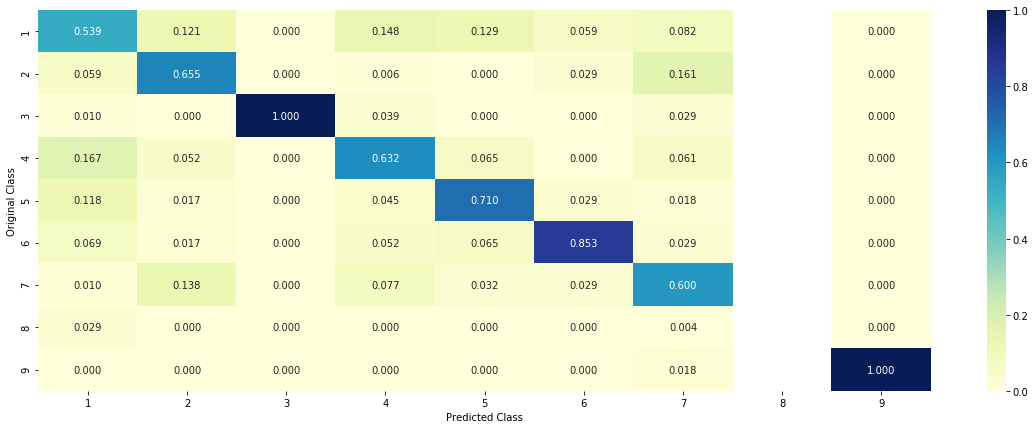

-------------------- Recall matrix (Row sum=1) --------------------


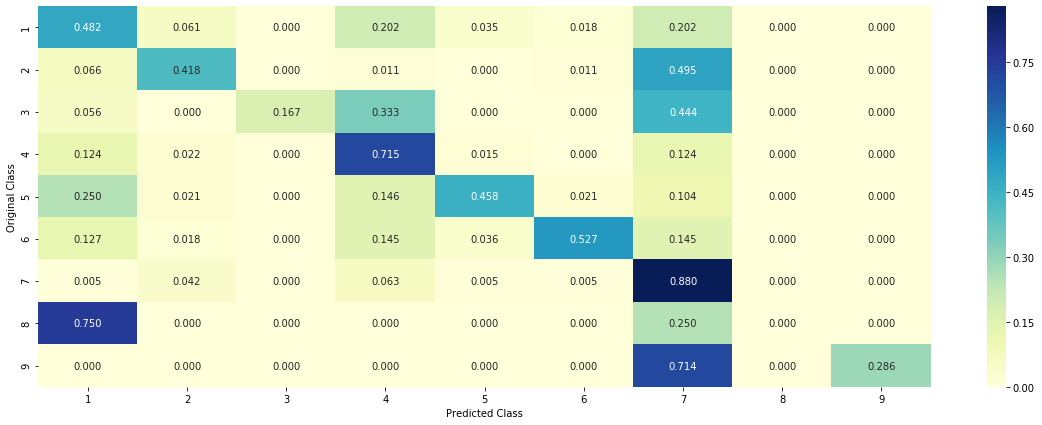

In [172]:


clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_avgw2v, train_y,test_x_avgw2v,test_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [183]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_avgw2v, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_avgw2v, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_avgw2v[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_avgw2v[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0439 0.5082 0.0112 0.0394 0.0298 0.0243 0.3343 0.0044 0.0045]]
Actual Class : 2
--------------------------------------------------
19 Text feature [001] present in test data point [True]
Out of the top  27  features  1 are present in query point


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [185]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_avgw2v[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_avgw2v[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.2051 0.1509 0.0235 0.1846 0.0657 0.0462 0.3044 0.0087 0.0109]]
Actual Class : 2
--------------------------------------------------
Out of the top  27  features  0 are present in query point


### Hypertuning with Avgw2v(text) + responsecoding(Genes, Variation, Text)

In [128]:
from scipy.sparse import csr_matrix
train_gene_var_tfidf = hstack((csr_matrix(train_gene_feature_responseCoding),train_variation_feature_responseCoding,train_x_combined_feat))
test_gene_var_tfidf = hstack((csr_matrix(test_gene_feature_responseCoding),test_variation_feature_responseCoding,test_x_combined_feat))
cv_gene_var_tfidf = hstack((csr_matrix(cv_gene_feature_responseCoding),cv_variation_feature_responseCoding,cv_x_combined_feat))

train_x_avgw2v = hstack((train_gene_var_tfidf, csr_matrix(avg_w2v_vectors_text_train),csr_matrix(train_text_feature_responseCoding))).tocsr()
#train_y = np.array(list(train_df['Class']))

test_x_avgw2v = hstack((test_gene_var_tfidf, csr_matrix(avg_w2v_vectors_text_test),csr_matrix(test_text_feature_responseCoding))).tocsr()
#test_y = np.array(list(test_df['Class']))

cv_x_avgw2v = hstack((cv_gene_var_tfidf, csr_matrix(avg_w2v_vectors_text_cv),csr_matrix(cv_text_feature_responseCoding))).tocsr()
#cv_y = np.array(list(cv_df['Class']))


In [129]:
print("Trainig data shape:",train_x_avgw2v.shape)
print("Test data shape:",test_x_avgw2v.shape)
print("Cross-validation data shape:",cv_x_avgw2v.shape)

Trainig data shape: (2124, 330)
Test data shape: (665, 330)
Cross-validation data shape: (532, 330)


In [130]:


alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_avgw2v, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_avgw2v, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_avgw2v)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_avgw2v, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_avgw2v, train_y)

predict_y = sig_clf.predict_proba(train_x_avgw2v)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_avgw2v)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_avgw2v)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(test_y, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.6816196162661659
for n_estimators = 10 and max depth =  3
Log Loss : 1.5144485095010711
for n_estimators = 10 and max depth =  5
Log Loss : 1.3333269064141617
for n_estimators = 10 and max depth =  10
Log Loss : 1.1354060250602758
for n_estimators = 50 and max depth =  2
Log Loss : 1.5090376337694833
for n_estimators = 50 and max depth =  3
Log Loss : 1.4153950685527474
for n_estimators = 50 and max depth =  5
Log Loss : 1.155013469528447
for n_estimators = 50 and max depth =  10
Log Loss : 1.0219292295395423
for n_estimators = 100 and max depth =  2
Log Loss : 1.4485840415783957
for n_estimators = 100 and max depth =  3
Log Loss : 1.3594928855616897
for n_estimators = 100 and max depth =  5
Log Loss : 1.118241181180074
for n_estimators = 100 and max depth =  10
Log Loss : 1.0037109622249145
for n_estimators = 200 and max depth =  2
Log Loss : 1.3693784904552857
for n_estimators = 200 and max depth =  3
Log Loss : 1.250519074165179


Log loss : 0.9933804620984583
Number of mis-classified points : 0.3368421052631579
-------------------- Confusion matrix --------------------


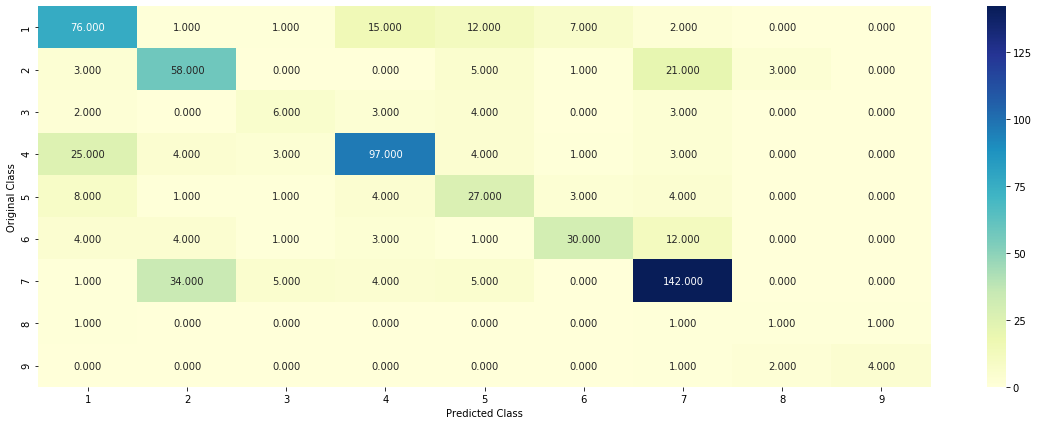

-------------------- Precision matrix (Columm Sum=1) --------------------


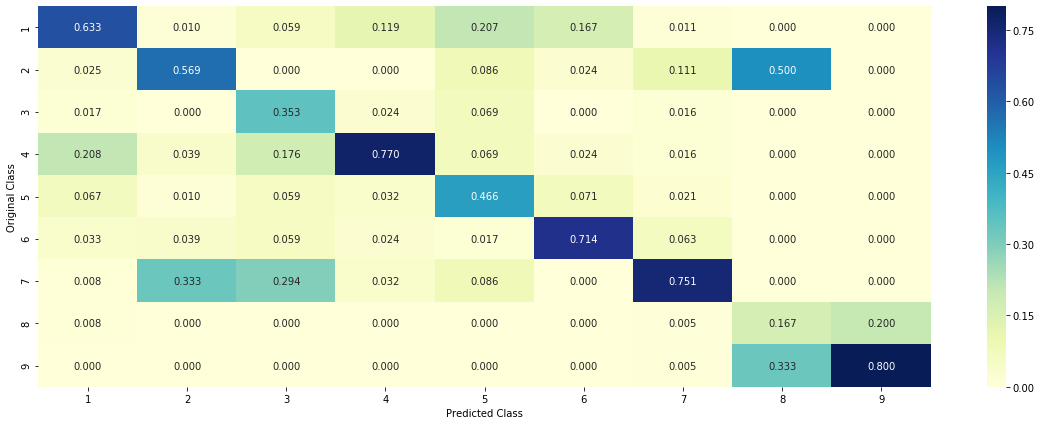

-------------------- Recall matrix (Row sum=1) --------------------


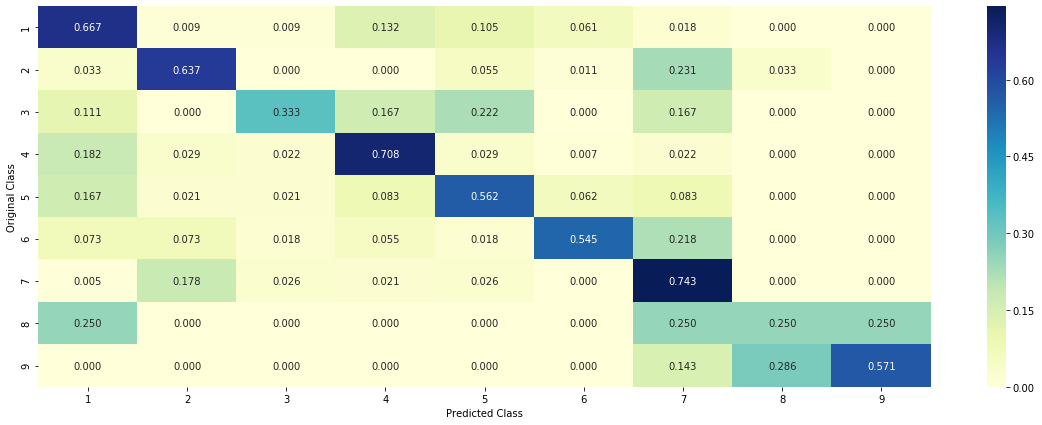

In [131]:
clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_avgw2v, train_y,test_x_avgw2v,test_y, clf)

### Correctly Classified Points

In [193]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_avgw2v, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_avgw2v, train_y)


test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_avgw2v[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_avgw2v[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0047 0.5984 0.012  0.0042 0.0073 0.0255 0.3208 0.0223 0.0048]]
Actual Class : 2
--------------------------------------------------
Out of the top  100  features  0 are present in query point


### Incorrectly Classified Points

In [198]:
test_point_index = 98
predicted_cls = sig_clf.predict(test_x_avgw2v[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_avgw2v[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0174 0.1699 0.0587 0.0317 0.0352 0.419  0.2402 0.012  0.016 ]]
Actual Class : 7
--------------------------------------------------
Out of the top  100  features  0 are present in query point


## Hypertuning using TFIDF Vectors(Text) + ResponseCoding(Genes + Variations + Text)

In [124]:
from scipy.sparse import csr_matrix
train_gene_var_tfidf = hstack((csr_matrix(train_gene_feature_responseCoding),train_variation_feature_responseCoding,train_x_combined_feat))
test_gene_var_tfidf = hstack((csr_matrix(test_gene_feature_responseCoding),test_variation_feature_responseCoding,test_x_combined_feat))
cv_gene_var_tfidf = hstack((csr_matrix(cv_gene_feature_responseCoding),cv_variation_feature_responseCoding,cv_x_combined_feat))

train_x_tfidfw2v = hstack((train_gene_var_tfidf, csr_matrix(tfidf_w2v_vectors_text_train),train_text_feature_tfidf_red,csr_matrix(avg_w2v_vectors_text_train),csr_matrix(train_text_feature_responseCoding))).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_tfidfw2v = hstack((test_gene_var_tfidf, csr_matrix(tfidf_w2v_vectors_text_test),test_text_feature_tfidf_red,csr_matrix(avg_w2v_vectors_text_test),csr_matrix(test_text_feature_responseCoding))).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_tfidfw2v = hstack((cv_gene_var_tfidf, csr_matrix(tfidf_w2v_vectors_text_cv),cv_text_feature_tfidf_red,csr_matrix(avg_w2v_vectors_text_cv),csr_matrix(cv_text_feature_responseCoding))).tocsr()
cv_y = np.array(list(cv_df['Class']))


In [123]:
train_text_feature_responseCoding.shape

(2124, 9)

In [125]:
print("Trainig data shape:",train_x_tfidfw2v.shape)
print("Test data shape:",test_x_tfidfw2v.shape)
print("Cross-validation data shape:",cv_x_tfidfw2v.shape)

Trainig data shape: (2124, 1630)
Test data shape: (665, 1630)
Cross-validation data shape: (532, 1630)


In [126]:
alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=111, n_jobs=-1,oob_score=True)
        clf.fit(train_x_tfidfw2v, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_tfidfw2v, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfw2v)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_tfidfw2v, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfw2v, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidfw2v)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(train_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfw2v)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(cv_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfw2v)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(test_y, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.624272025057539
for n_estimators = 10 and max depth =  3
Log Loss : 1.2449936248006543
for n_estimators = 10 and max depth =  5
Log Loss : 1.132243444943767
for n_estimators = 10 and max depth =  10
Log Loss : 1.0426743466576531
for n_estimators = 50 and max depth =  2
Log Loss : 1.2720358756231478
for n_estimators = 50 and max depth =  3
Log Loss : 1.1418341485042485
for n_estimators = 50 and max depth =  5
Log Loss : 1.0752081963446378
for n_estimators = 50 and max depth =  10
Log Loss : 1.015354686762169
for n_estimators = 100 and max depth =  2
Log Loss : 1.3550448829940356
for n_estimators = 100 and max depth =  3
Log Loss : 1.1868134495318126
for n_estimators = 100 and max depth =  5
Log Loss : 1.0878058503304242
for n_estimators = 100 and max depth =  10
Log Loss : 1.0030094693630363
for n_estimators = 200 and max depth =  2
Log Loss : 1.2781830850734444
for n_estimators = 200 and max depth =  3
Log Loss : 1.1751990345165881


Log loss : 0.9763342298518634
Number of mis-classified points : 0.3398496240601504
-------------------- Confusion matrix --------------------


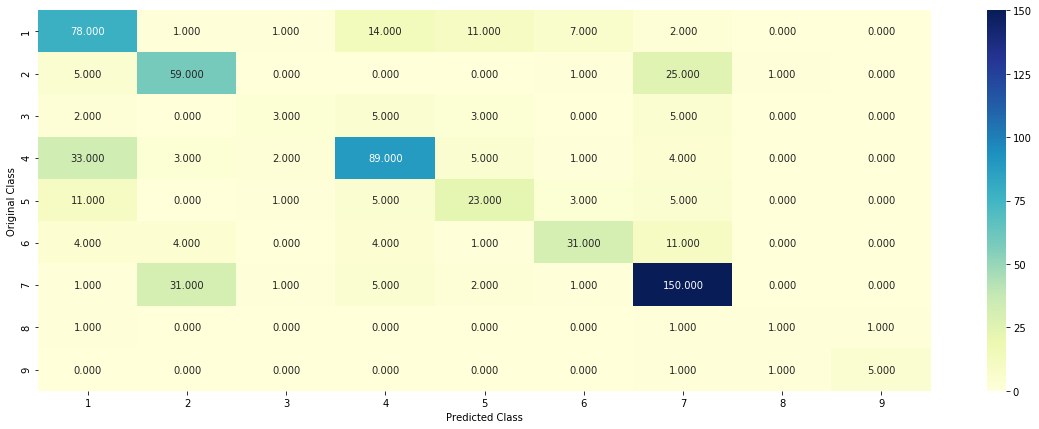

-------------------- Precision matrix (Columm Sum=1) --------------------


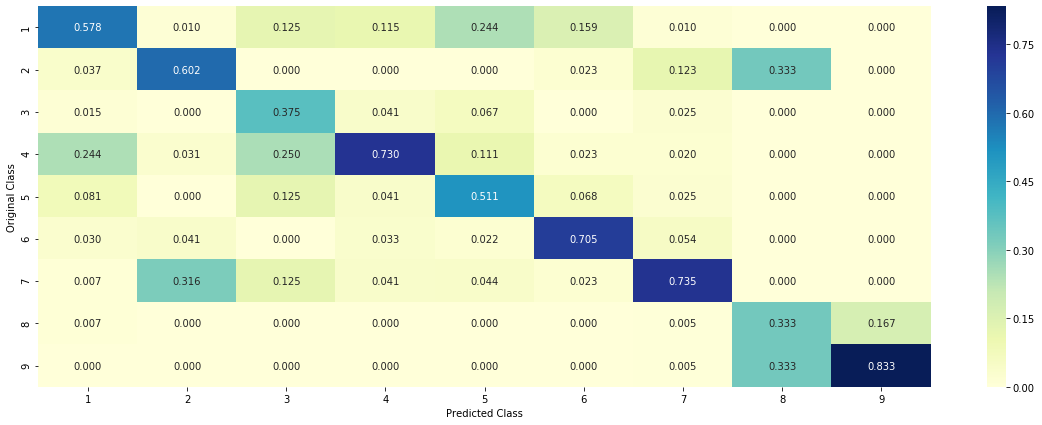

-------------------- Recall matrix (Row sum=1) --------------------


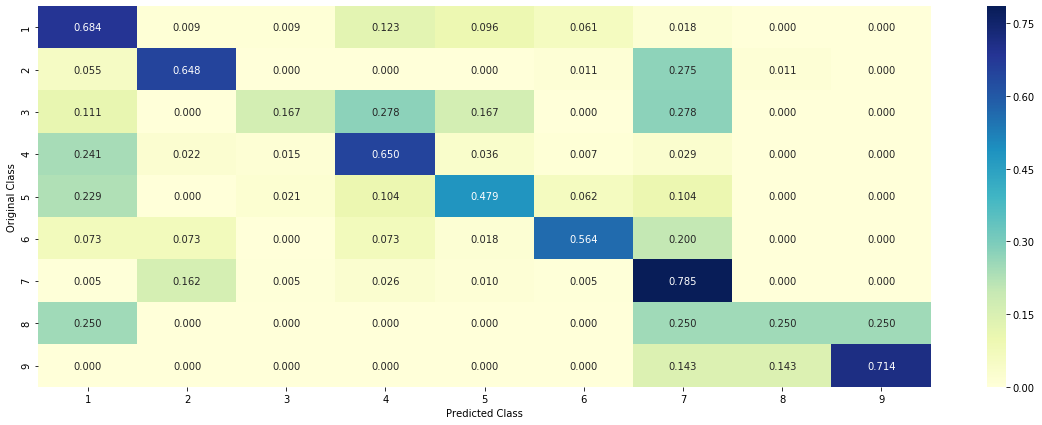

In [132]:
clf = RandomForestClassifier(max_depth=10, n_estimators=1000, criterion='gini', max_features='auto',random_state=111,oob_score=True)
predict_and_plot_confusion_matrix(train_x_tfidfw2v, train_y,test_x_tfidfw2v,test_y, clf)

<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [207]:

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_tfidf, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_tfidf, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_tfidf, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_tfidf, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_tfidf))))
sig_clf2.fit(train_x_tfidf, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_tfidf))))
sig_clf3.fit(train_x_tfidf, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_tfidf))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_tfidf, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_tfidf))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_tfidf))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.36
Support vector machines : Log Loss: 1.93
Naive Bayes : Log Loss: 1.35
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.041
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.552
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.302
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.556
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.908


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.6443092998159851
Log loss (CV) on the stacking classifier : 1.3019469784321558
Log loss (test) on the stacking classifier : 1.1662068502878893
Number of missclassified point : 0.37142857142857144
-------------------- Confusion matrix --------------------


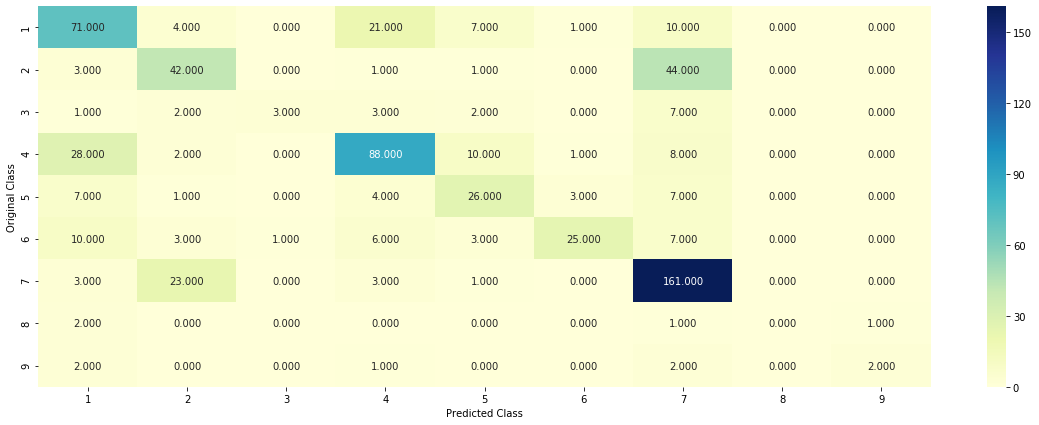

-------------------- Precision matrix (Columm Sum=1) --------------------


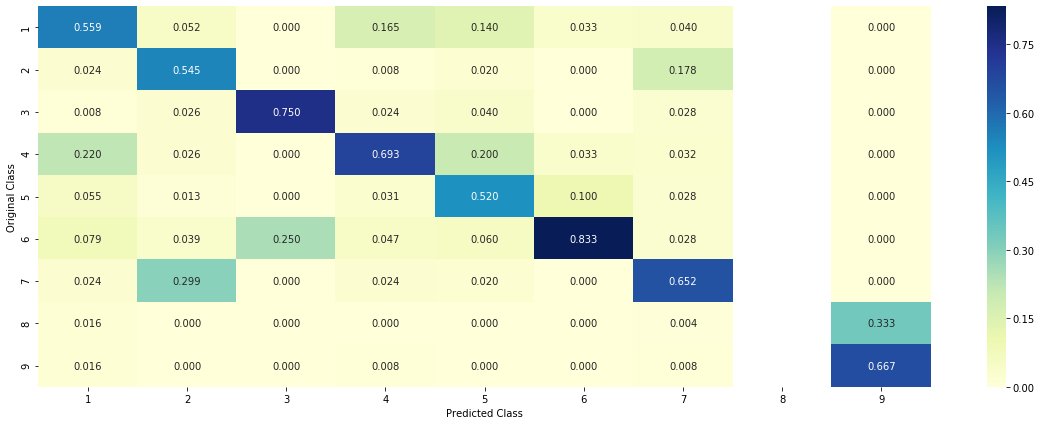

-------------------- Recall matrix (Row sum=1) --------------------


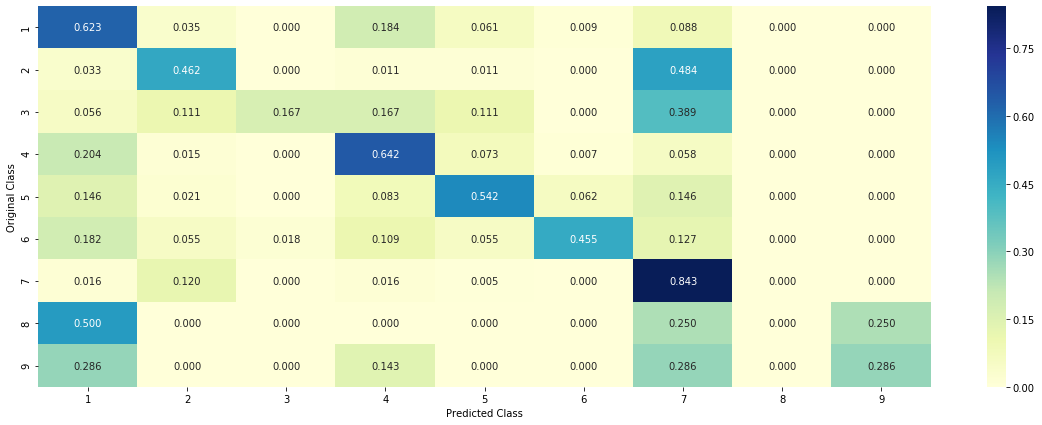

In [208]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_tfidf, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_tfidf))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_tfidf))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_tfidf))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_tfidf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_tfidf))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.887669222796579
Log loss (CV) on the VotingClassifier : 1.2882574400146602
Log loss (test) on the VotingClassifier : 1.2171057621055794
Number of missclassified point : 0.3669172932330827
-------------------- Confusion matrix --------------------


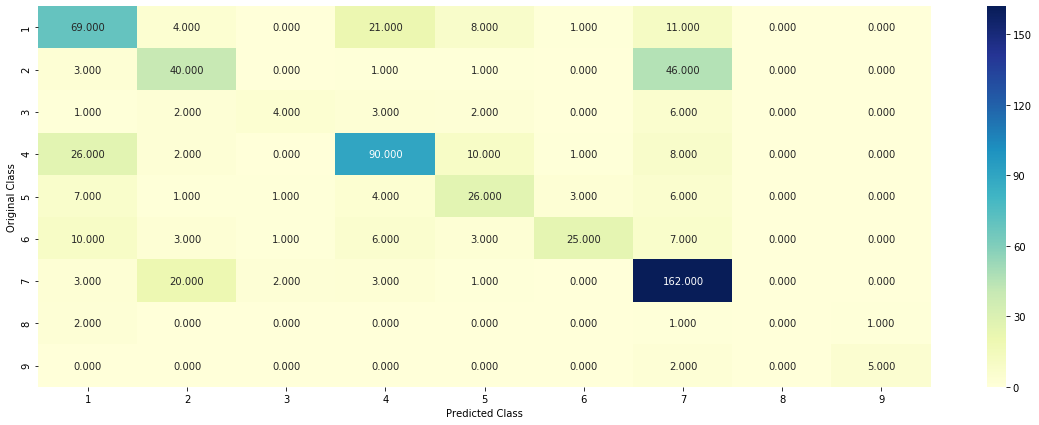

-------------------- Precision matrix (Columm Sum=1) --------------------


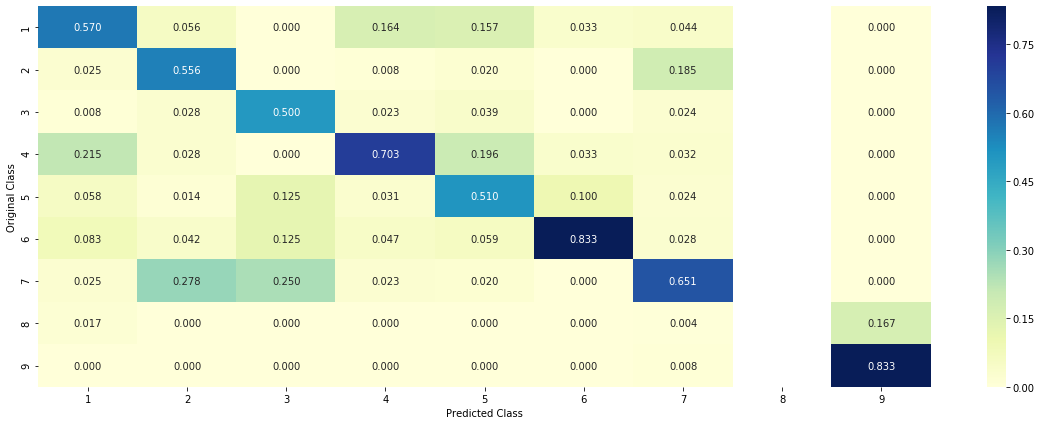

-------------------- Recall matrix (Row sum=1) --------------------


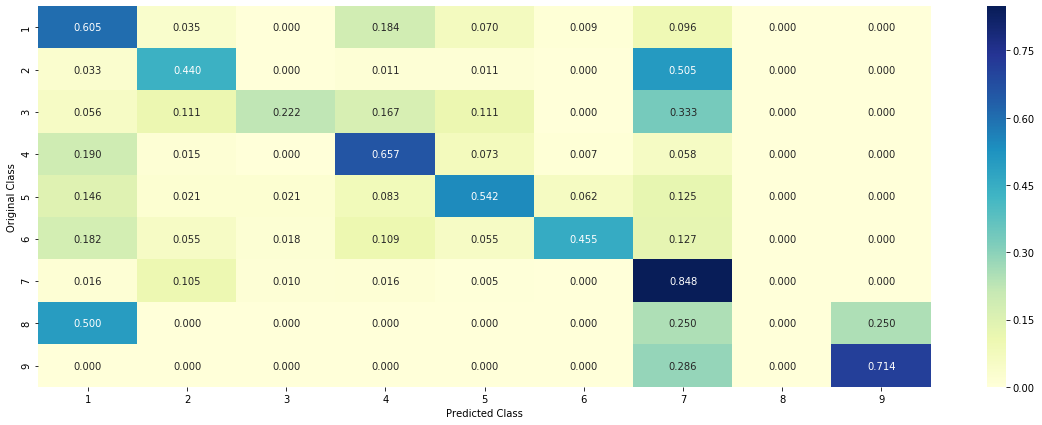

In [209]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_tfidf, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_tfidf)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_tfidf)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_tfidf)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_tfidf)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_tfidf))

## Conclusions

In [163]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Featurization","Train Log Loss","CV log loss","Test Log Loss","No. Of Miscalssified Pts"]
x.add_row(["Naive bayes","Tfidf",0.3866,1.308,1.274,0.4285])
x.add_row(["KNN","Response Coding",0.505,1.1053,1.068,0.3488])
x.add_row(["Logistic Regression Balanced","uni+bigram",0.6336,1.175,1.209,0.3864])
x.add_row(["Logistic Regression Unbalanced","Uni+bigram",0.687,1.132,1.180,0.372])
x.add_row(["Linear SVM","tfidf",0.423,1.108,1.140,0.3819])
x.add_row(["Random Forrest","Onehot",0.576,1.226,1.134,0.368])
x.add_row(["Random Forrest","Avgw2v + response",0.058,0.9938,0.9933,0.3368])
x.add_row(["Random Forrest","tfidfw2v + response",0.134,0.9934,0.976,0.3398])
x.add_row(["Stacking Classifier","tfidf",0.644,1.301,1.166,0.3714])
x.add_row(["Voting Classifier","tfidf",0.887,1.288,1.212,0.366])
print(x)

+--------------------------------+---------------------+----------------+-------------+---------------+--------------------------+
|             Model              |    Featurization    | Train Log Loss | CV log loss | Test Log Loss | No. Of Miscalssified Pts |
+--------------------------------+---------------------+----------------+-------------+---------------+--------------------------+
|          Naive bayes           |        Tfidf        |     0.3866     |    1.308    |     1.274     |          0.4285          |
|              KNN               |   Response Coding   |     0.505      |    1.1053   |     1.068     |          0.3488          |
|  Logistic Regression Balanced  |      uni+bigram     |     0.6336     |    1.175    |     1.209     |          0.3864          |
| Logistic Regression Unbalanced |      Uni+bigram     |     0.687      |    1.132    |      1.18     |          0.372           |
|           Linear SVM           |        tfidf        |     0.423      |    1.108 